#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

#!pip install --upgrade mplfinance

In [5]:
!pip install plotly==4.14.3

In [8]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# import ploty.graph as go
import plotly.graph_objects as go
# import mplfinance as mpf

In [10]:
#loading data
data= pd.read_csv("NIO_STOCK_DATA_10yrs.csv", index_col=0)
data

timestamp      Close       Open        Low       High     Volume
0    2018-09-12   6.600000   6.000000   5.350000   6.930000   66849000
1    2018-09-13  11.600000   6.620000   6.520000  12.690000  158346500
2    2018-09-14   9.900000  12.660000   9.220000  13.800000  172473600
3    2018-09-17   8.500000   9.610000   8.500000   9.750000   56323900
4    2018-09-18   7.680000   8.730000   7.670000   9.100000   41827600
..          ...        ...        ...        ...        ...        ...
600  2021-02-01  56.990002  59.070000  54.369999  59.119999   79878700
601  2021-02-02  55.770000  57.060001  54.509998  57.540001   66234100
602  2021-02-03  57.980000  55.959999  54.840000  58.720001   80122300
603  2021-02-04  57.599998  58.790001  57.110001  59.200001   48667900
604  2021-02-05  56.669998  57.740002  56.009998  57.980000   42892500

[605 rows x 6 columns]

In [11]:
#converting datatype of timestamp to datetime
data['timestamp']=pd.to_datetime(data['timestamp'])
data

timestamp      Close       Open        Low       High     Volume
0   2018-09-12   6.600000   6.000000   5.350000   6.930000   66849000
1   2018-09-13  11.600000   6.620000   6.520000  12.690000  158346500
2   2018-09-14   9.900000  12.660000   9.220000  13.800000  172473600
3   2018-09-17   8.500000   9.610000   8.500000   9.750000   56323900
4   2018-09-18   7.680000   8.730000   7.670000   9.100000   41827600
..         ...        ...        ...        ...        ...        ...
600 2021-02-01  56.990002  59.070000  54.369999  59.119999   79878700
601 2021-02-02  55.770000  57.060001  54.509998  57.540001   66234100
602 2021-02-03  57.980000  55.959999  54.840000  58.720001   80122300
603 2021-02-04  57.599998  58.790001  57.110001  59.200001   48667900
604 2021-02-05  56.669998  57.740002  56.009998  57.980000   42892500

[605 rows x 6 columns]

In [12]:
#creating a column for weekdays before setting timestamp as index and also creating a column indicating the week number e.g week 1
data['Weekday']=data['timestamp'].dt.day_name()
data

timestamp      Close       Open        Low       High     Volume  \
0   2018-09-12   6.600000   6.000000   5.350000   6.930000   66849000   
1   2018-09-13  11.600000   6.620000   6.520000  12.690000  158346500   
2   2018-09-14   9.900000  12.660000   9.220000  13.800000  172473600   
3   2018-09-17   8.500000   9.610000   8.500000   9.750000   56323900   
4   2018-09-18   7.680000   8.730000   7.670000   9.100000   41827600   
..         ...        ...        ...        ...        ...        ...   
600 2021-02-01  56.990002  59.070000  54.369999  59.119999   79878700   
601 2021-02-02  55.770000  57.060001  54.509998  57.540001   66234100   
602 2021-02-03  57.980000  55.959999  54.840000  58.720001   80122300   
603 2021-02-04  57.599998  58.790001  57.110001  59.200001   48667900   
604 2021-02-05  56.669998  57.740002  56.009998  57.980000   42892500   

       Weekday  
0    Wednesday  
1     Thursday  
2       Friday  
3       Monday  
4      Tuesday  
..         ...  
600     Monday  
601    Tuesday  
602  Wednesday  
603   Thursday  
604     Friday  

[605 rows x 7 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  600 non-null    datetime64[ns]
 1   Close      600 non-null    float64       
 2   Open       600 non-null    float64       
 3   Low        600 non-null    float64       
 4   High       600 non-null    float64       
 5   Volume     600 non-null    int64         
 6   Weekday    600 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.5+ KB


In [6]:
# we make the Date column the index so as to use Date slicing below
# run this code box just once, other times would return a KeyError
data = data.set_index("timestamp")

In [7]:
data.describe(include= 'all')

Close        Open         Low        High        Volume  Weekday
count   600.000000  600.000000  600.000000  600.000000  6.000000e+02      600
unique         NaN         NaN         NaN         NaN           NaN        5
top            NaN         NaN         NaN         NaN           NaN  Tuesday
freq           NaN         NaN         NaN         NaN           NaN      122
mean     11.046317   11.025883   10.569650   11.454017  6.724531e+07      NaN
std      14.217751   14.195104   13.592902   14.716248  7.773440e+07      NaN
min       1.320000    1.190000    1.190000    1.450000  5.111000e+06      NaN
25%       3.187500    3.147500    3.065000    3.270000  2.006578e+07      NaN
50%       5.375000    5.490000    5.290000    5.655000  3.942200e+07      NaN
75%       9.805000    9.805000    9.167500   10.280000  7.849030e+07      NaN
max      62.700001   64.949997   62.189999   66.989998  5.771851e+08      NaN

In [15]:
data.isnull().sum()

Close      0
Open       0
Low        0
High       0
Volume     0
Weekday    0
dtype: int64

In [9]:
data

Close       Open        Low       High     Volume    Weekday
timestamp                                                                   
2018-09-12   6.600000   6.000000   5.350000   6.930000   66849000  Wednesday
2018-09-13  11.600000   6.620000   6.520000  12.690000  158346500   Thursday
2018-09-14   9.900000  12.660000   9.220000  13.800000  172473600     Friday
2018-09-17   8.500000   9.610000   8.500000   9.750000   56323900     Monday
2018-09-18   7.680000   8.730000   7.670000   9.100000   41827600    Tuesday
...               ...        ...        ...        ...        ...        ...
2021-01-25  59.990002  64.050003  58.349998  64.519997  111986400     Monday
2021-01-26  60.310001  60.040001  58.639999  60.669998   70393300    Tuesday
2021-01-27  57.150002  57.950001  56.599998  59.790001   73078300  Wednesday
2021-01-28  58.369999  56.759998  55.150002  59.459999   73955100   Thursday
2021-01-29  57.000000  59.029999  56.439999  60.709999   78371600     Friday

[600 rows x 6 columns]

#  INTERACTIVE ANALYSIS

In [17]:
figure = go.Figure(
        data=[
            go.Candlestick(
            x = data.index,
            low = data['Low'],
            high = data['High'],
            open = data['Open'],
            close = data['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
            )
        ]
)

figure.show()

In [11]:
mpf.plot(data,type='line',figratio=(20,12),volume=True)

This code Below is called timestamp slicing, it is very similar to pyhton index slicing but this time We are dataframe index slicing

# YEAR 2019 analysis

In [12]:
# This slices from the beginnning of 2019 to the end
# as you can see  with the head and tail functions
NIO_2019 = data["2019":"2019"]
NIO_2019.head()

Close  Open   Low  High   Volume    Weekday
timestamp                                              
2019-01-02   6.20  6.13  6.00  6.24  8823600  Wednesday
2019-01-03   6.05  6.10  6.02  6.15  7562900   Thursday
2019-01-04   6.36  6.19  6.13  6.40  9405600     Friday
2019-01-07   6.50  6.41  6.31  6.59  9709000     Monday
2019-01-08   6.40  6.57  6.17  6.58  9603800    Tuesday

In [13]:
NIO_2019.tail()

Close  Open   Low  High     Volume   Weekday
timestamp                                               
2019-12-24   2.53  2.63  2.45  2.63   32029800   Tuesday
2019-12-26   2.51  2.45  2.35  2.52   44173700  Thursday
2019-12-27   2.42  2.54  2.41  2.55   37553300    Friday
2019-12-30   3.72  2.92  2.88  4.87  432720700    Monday
2019-12-31   4.02  4.15  3.82  4.42  215008600   Tuesday

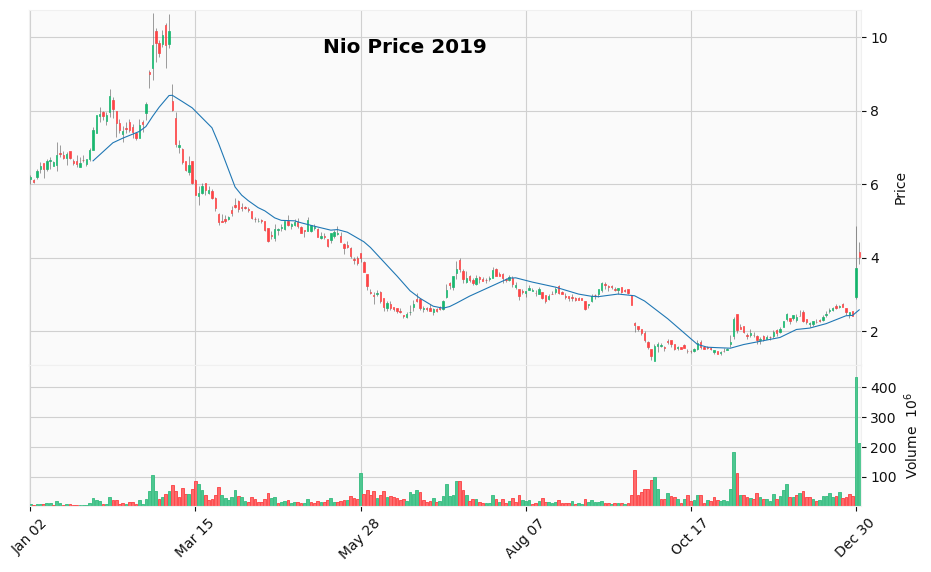

In [14]:
#plotting candle charts for the year
mpf.plot(data['2019-01':'2019-12'],type='candle',mav=(20),
         title='Nio Price 2019',volume=True,style='yahoo',figratio=(20,12),tight_layout=True)

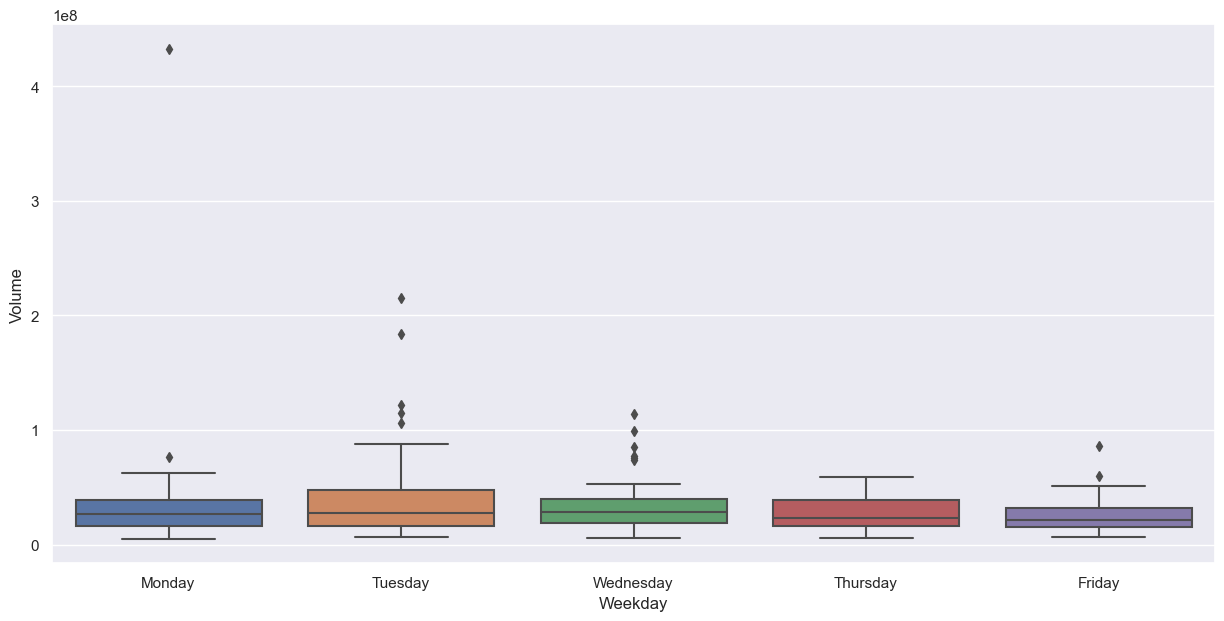

In [15]:
#visualising stock volume for each day of the week in year 2019
order=['Monday','Tuesday','Wednesday','Thursday','Friday']
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(data=NIO_2019,x='Weekday',y='Volume',order=order);


<ipython-input-16-7769d0ee42dd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index, rotation=90)


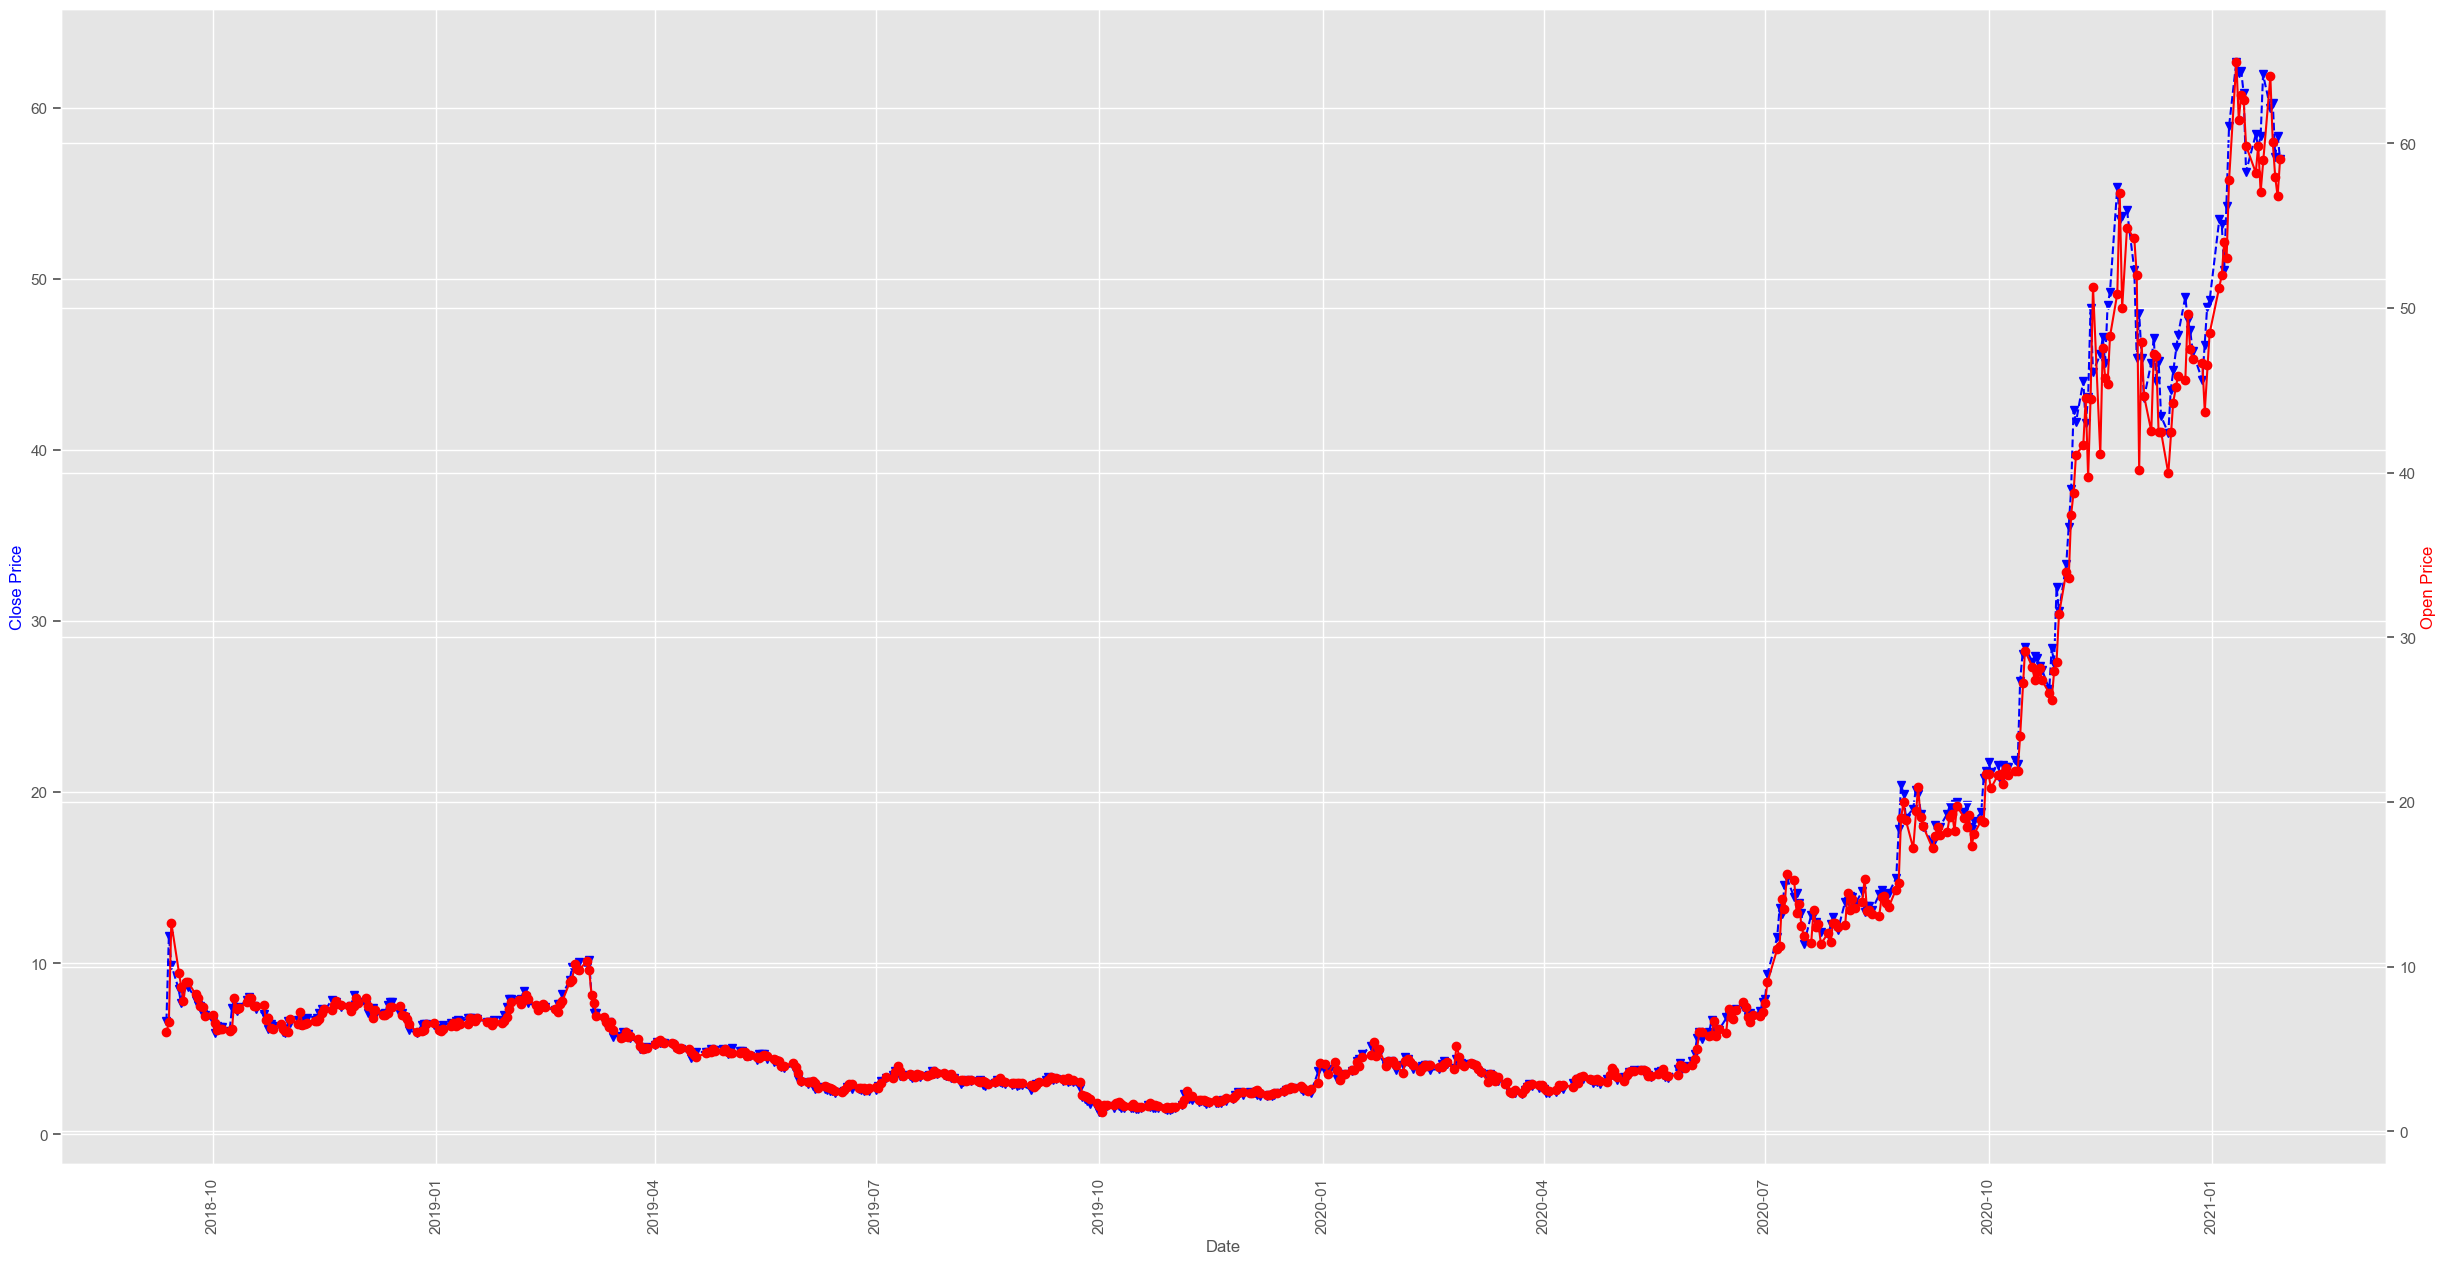

In [16]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([30, 15])
ax.plot(data.index, data["Close"], color='blue', marker="v", linestyle="--")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price", color='blue')
ax.set_xticklabels(data.index, rotation=90)

ax2 = ax.twinx()
ax2.plot(data.index, data["Open"], color='red', marker="o")
ax2.set_ylabel("Open Price", color='red')
 #save the picture on your local machine to visualize properly
fig.savefig("NIO_2019.png", dpi=300)

# January analysis

In [17]:
# This slices from the whole of January 2019
#NIO_2019_jan_1 = data["2019-1":"2019-1"]
#NIO_2019_jan_1

In [18]:
# plotting a graph of whole of January 2019's Open and Close price in the same graph
# this matplotlib code syntax isnt common, pls use another code syntax if youre not comfortable with this one
# you can contact khaleed if you have any questions regarding this
#plt.style.use("ggplot")
#fig, ax = plt.subplots()
#fig.set_size_inches([30, 15])
#ax.plot(NIO_2019_jan_1.index, NIO_2019_jan_1["Close"], color='blue', marker="v", linestyle="--")
#ax.set_xlabel("Date")
#ax.set_ylabel("Close Price", color='blue')
#ax.set_xticklabels(NIO_2019_jan_1.index, rotation=90)

#ax2 = ax.twinx()
#ax2.plot(NIO_2019_jan_1.index, NIO_2019_jan_1["Open"], color='red', marker="o")
#ax2.set_ylabel("Open Price", color='red')
# save the picture on your local machine to visualize properly
#fig.savefig("NIO_jan_2019.png", dpi=300)

In [19]:
#Plotting Candle chart for january
#mpf.plot(data['2019-01'],type='candle',mav=(20),
         #title='Nio_Jan Price 2019',volume=True,style='yahoo',
         #figratio=(20,12),tight_layout=True)


Moving average is used to identify trading opportunities.if an investor buys a stock on the 2nd of January at the price below the moving average,he will make profits if he decides to sell at the end of the month when the price of the stock is above the moving average.

In [20]:
#finding the correlation between the prices for the month of january
#jan_corr=NIO_2019_jan_1.corr()
#sns.heatmap(jan_corr,annot=True,cmap="seismic",
          # xticklabels=jan_corr.columns.values,
          # yticklabels=jan_corr.columns.values)b
#plt.title('Prices correlation for the month of January')
#plt.show()
#print(jan_corr)

In [21]:
#scatter plot showing relationship between open and close prices
#NIO_2019_jan_1.plot.scatter(x='Open',y='Close',c=('red'))
#obtaining the slop and intercept of regression line
#m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
#plt.plot(x,m*x+b);

In [22]:
#scatter plot showing relationship between open and close prices
#NIO_2019_jan_1.plot.scatter(x='Low',y='High',c=('red'))
#obtaining the slop and intercept of regression line
#m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
#plt.plot(x,m*x+b);

In [23]:
#trying to visualise the days large volumes of stocks were sold
#days_to_volume=NIO_2019_jan_1.sort_values(by=["Volume"],ascending=False)
#days_to_volume

In [24]:
#boxplot showing total volume traded on days of the week for January
#order=['Monday','Tuesday','Wednesday','Thursday','Friday']
#sns.set(rc={'figure.figsize':(15,7)})
#sns.boxplot(data=days_to_volume,x='Weekday',y='Volume',order=order);


In [25]:
#barplot showing total volume traded on days of the week for the month of january
#order=['Monday','Tuesday','Wednesday','Thursday','Friday']
#sns.set(rc={'figure.figsize':(15,7)})
#sns.barplot(data=days_to_volume,x='Weekday',y='Volume',order=order);


## checking for outliers in each column

In [26]:
#checking for outliers in close column
#sns.boxplot(y=NIO_2019_jan_1['Close']);
#plt.show()

In [27]:
#checking for outliers in open column
#sns.boxplot(y=NIO_2019_jan_1['Open']);
#plt.show()

In [28]:
#checking for outliers in low column
#sns.boxplot(y=NIO_2019_jan_1['Low']);
#plt.show()

In [29]:
#checking for outliers in high column
#sns.boxplot(y=NIO_2019_jan_1['High']);
#plt.show()

In [30]:
#checking for outliers in volume column
#sns.boxplot(y=NIO_2019_jan_1['Volume']);
#plt.show()

# visualisation on quarterly basis
### 1st quarter

In [31]:
#loading data for first quarter
df_1=data["2019-1":"2019-3"]
df_1

Close  Open   Low  High    Volume    Weekday
timestamp                                               
2019-01-02   6.20  6.13  6.00  6.24   8823600  Wednesday
2019-01-03   6.05  6.10  6.02  6.15   7562900   Thursday
2019-01-04   6.36  6.19  6.13  6.40   9405600     Friday
2019-01-07   6.50  6.41  6.31  6.59   9709000     Monday
2019-01-08   6.40  6.57  6.17  6.58   9603800    Tuesday
...           ...   ...   ...   ...       ...        ...
2019-03-25   5.35  5.62  5.27  5.66  38993300     Monday
2019-03-26   4.96  5.20  4.90  5.22  67206300    Tuesday
2019-03-27   4.98  5.01  4.96  5.19  39753400  Wednesday
2019-03-28   5.01  5.04  4.93  5.17  29281400   Thursday
2019-03-29   5.10  5.06  5.03  5.13  23595900     Friday

[61 rows x 6 columns]

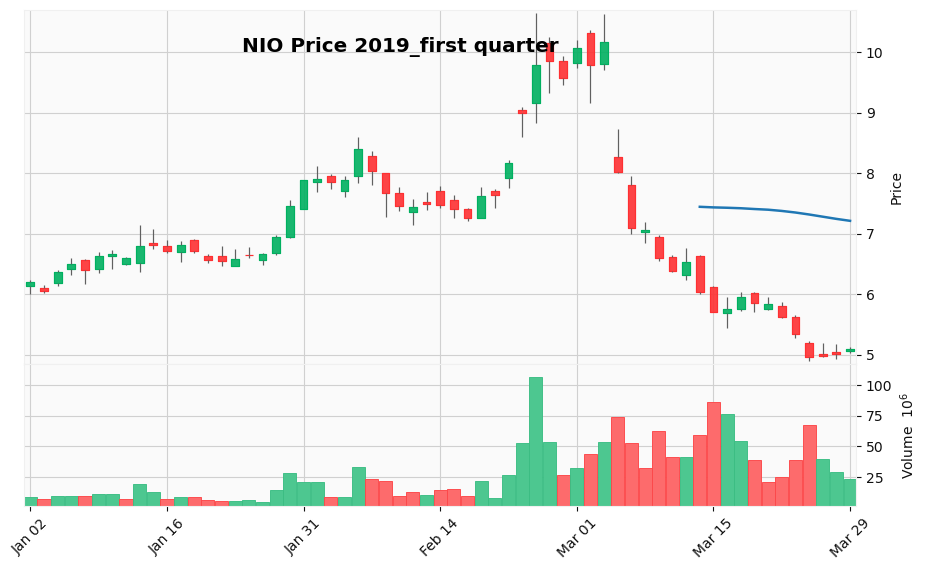

In [32]:
#Plotting Candle chart for first quarter of 2019
mpf.plot(df_1,type='candle',mav=(50),
         title='NIO Price 2019_first quarter',volume=True,style='yahoo',
         figratio=(20,12),tight_layout=True)


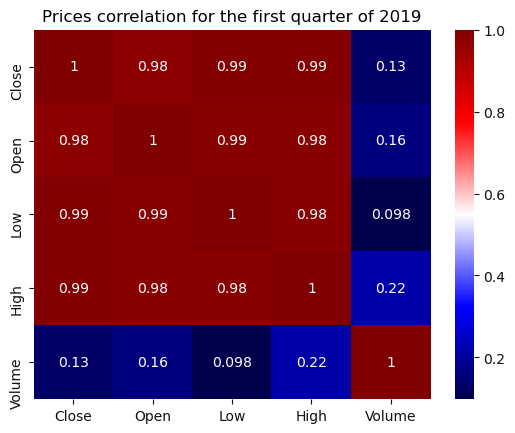

           Close      Open       Low      High    Volume
Close   1.000000  0.978035  0.992147  0.991013  0.130996
Open    0.978035  1.000000  0.985652  0.984307  0.161609
Low     0.992147  0.985652  1.000000  0.984379  0.097858
High    0.991013  0.984307  0.984379  1.000000  0.217151
Volume  0.130996  0.161609  0.097858  0.217151  1.000000


In [33]:
#finding the correlation between the prices for the month of january
first_quarter_corr=df_1.corr()
sns.heatmap(first_quarter_corr,annot=True,cmap="seismic",
           xticklabels=first_quarter_corr.columns.values,
           yticklabels=first_quarter_corr.columns.values)
plt.title('Prices correlation for the first quarter of 2019')
plt.show()
print(first_quarter_corr)

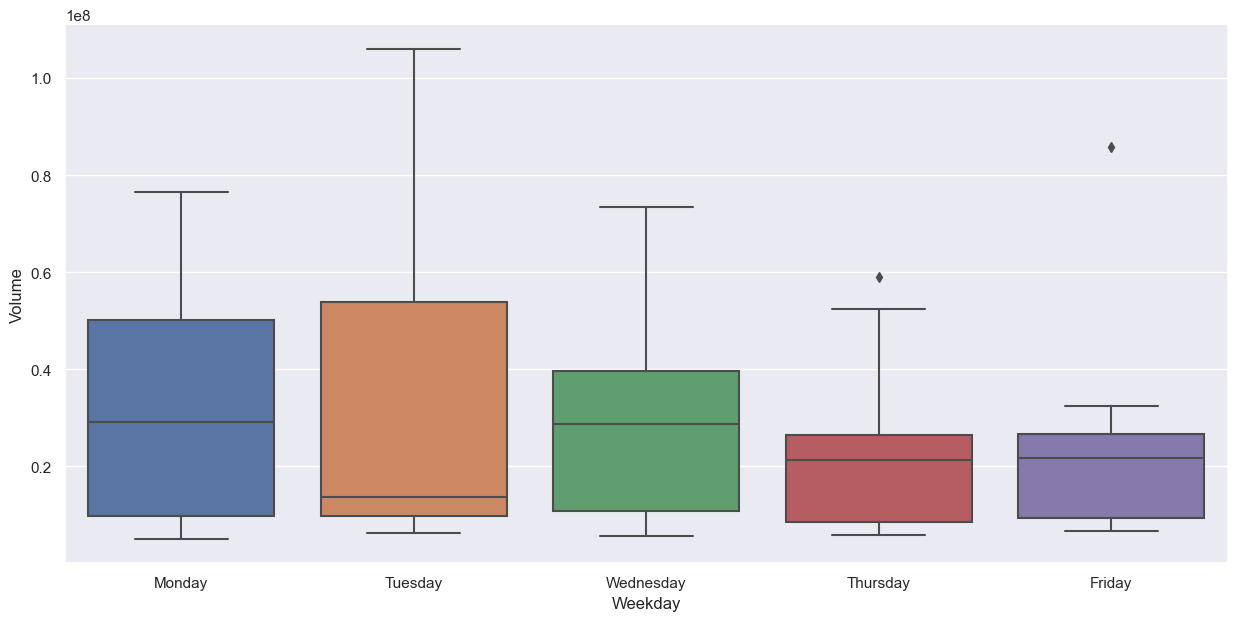

In [34]:
#checking out volume traded on each day of the week for the first quarter
order=['Monday','Tuesday','Wednesday','Thursday','Friday']
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(data=df_1,x='Weekday',y='Volume',order=order);


### checking for outliers in each column

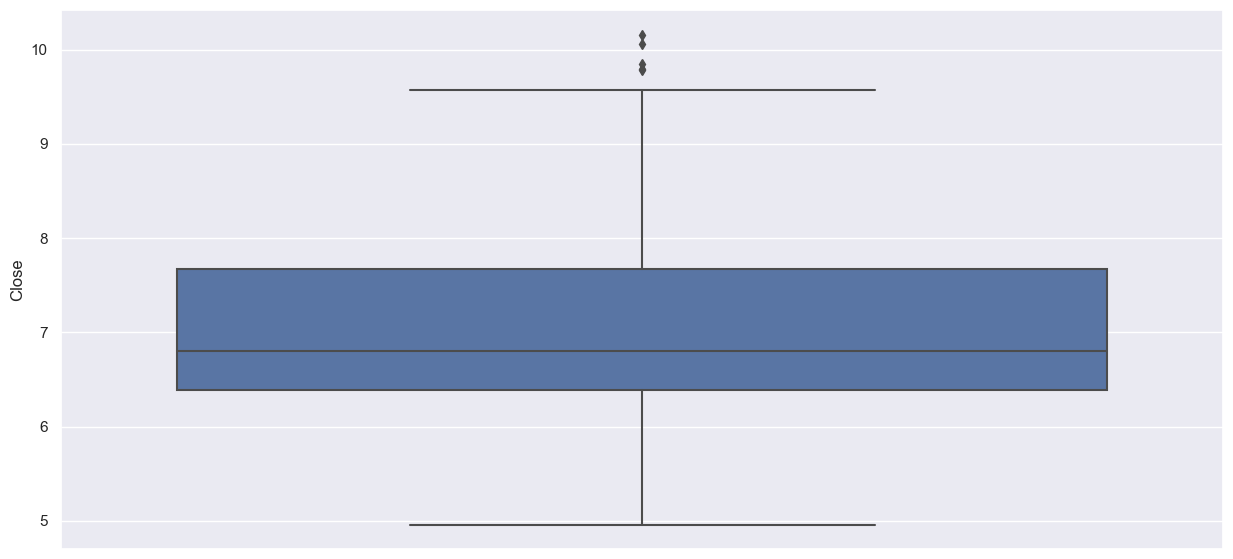

In [35]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_1['Close']);
plt.show()

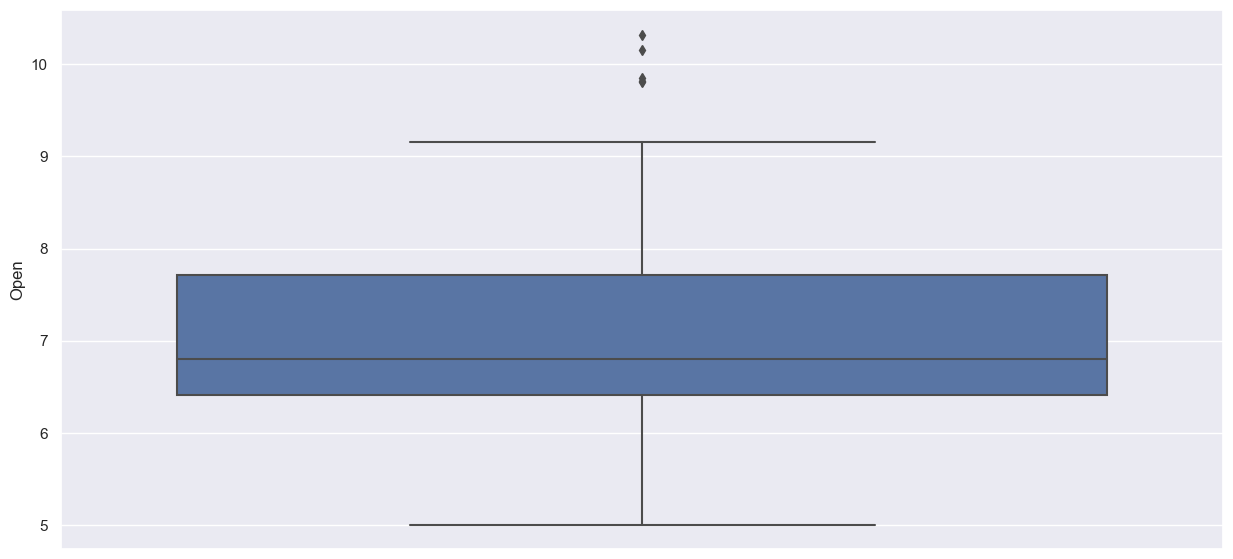

In [36]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_1['Open']);
plt.show()

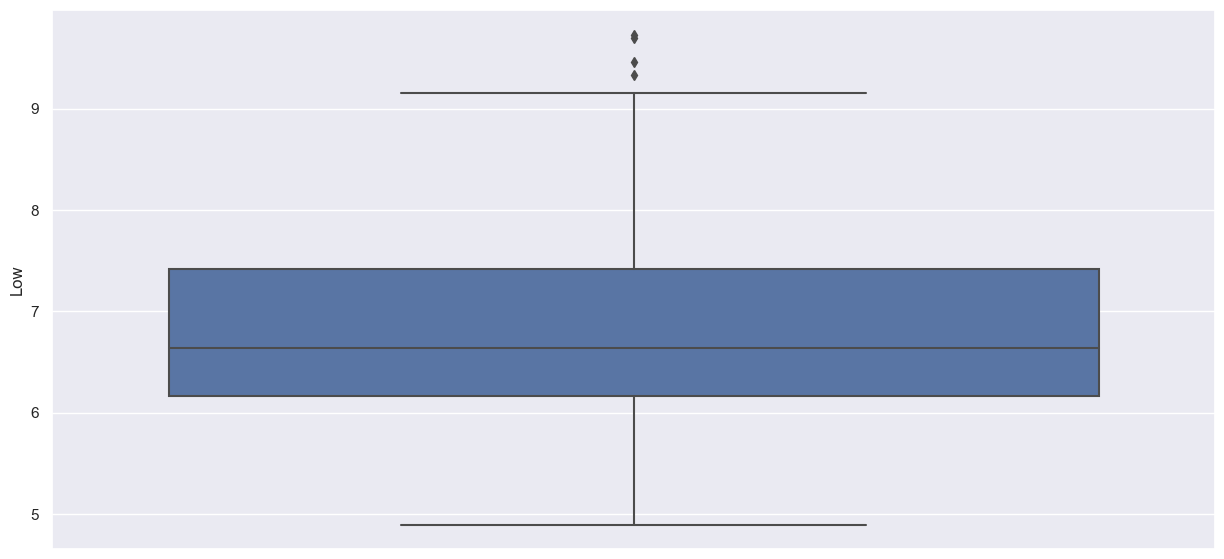

In [37]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_1['Low']);
plt.show()

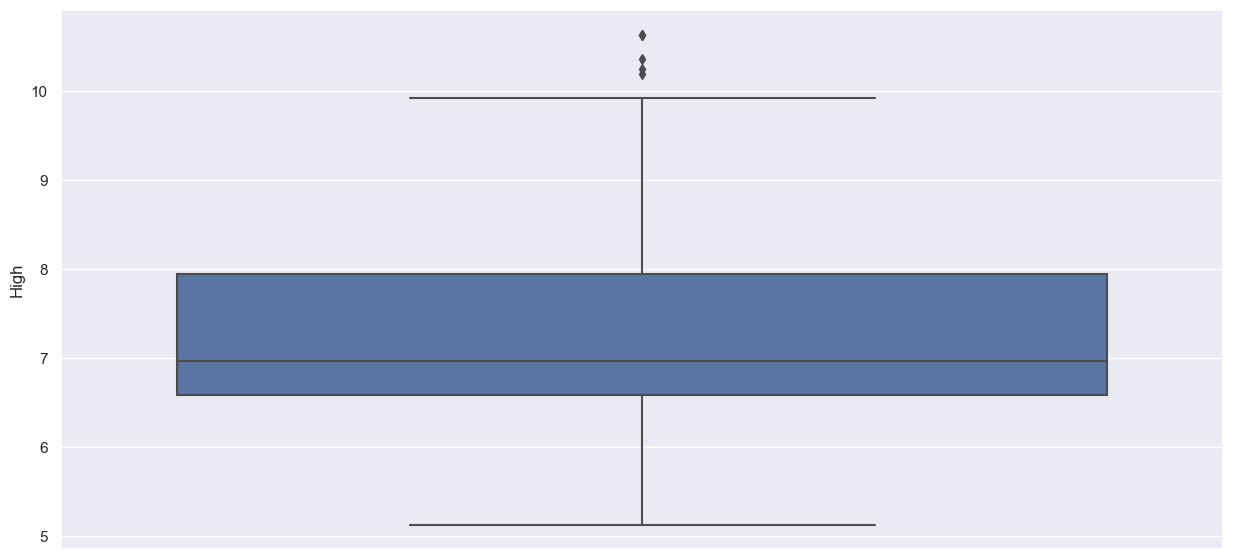

In [38]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_1['High']);
plt.show()

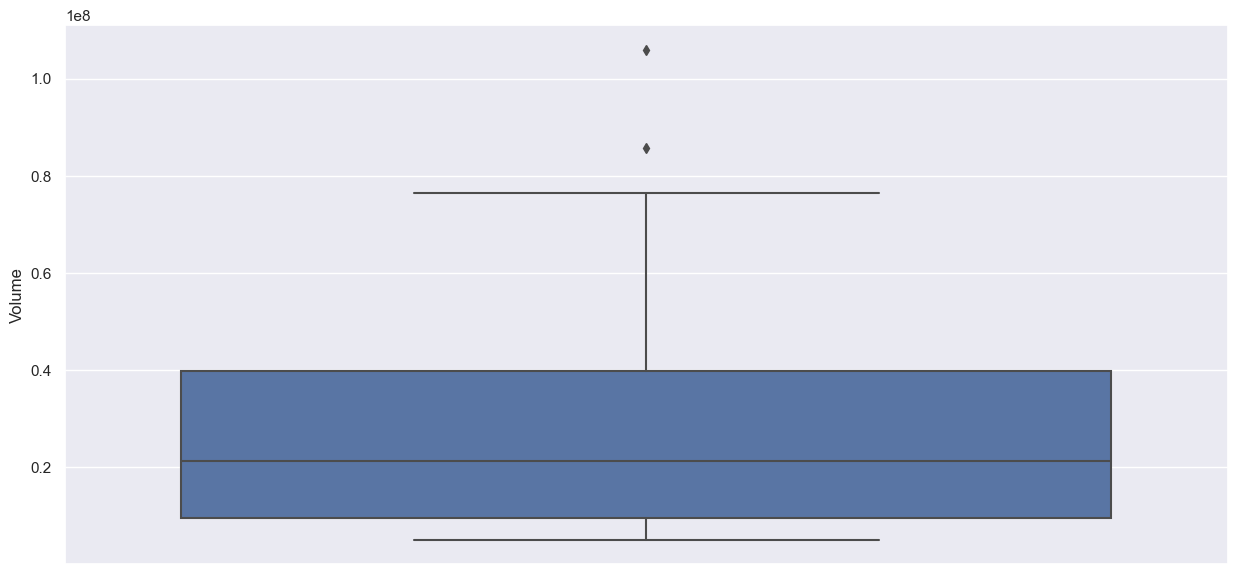

In [39]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_1['Volume']);
plt.show()

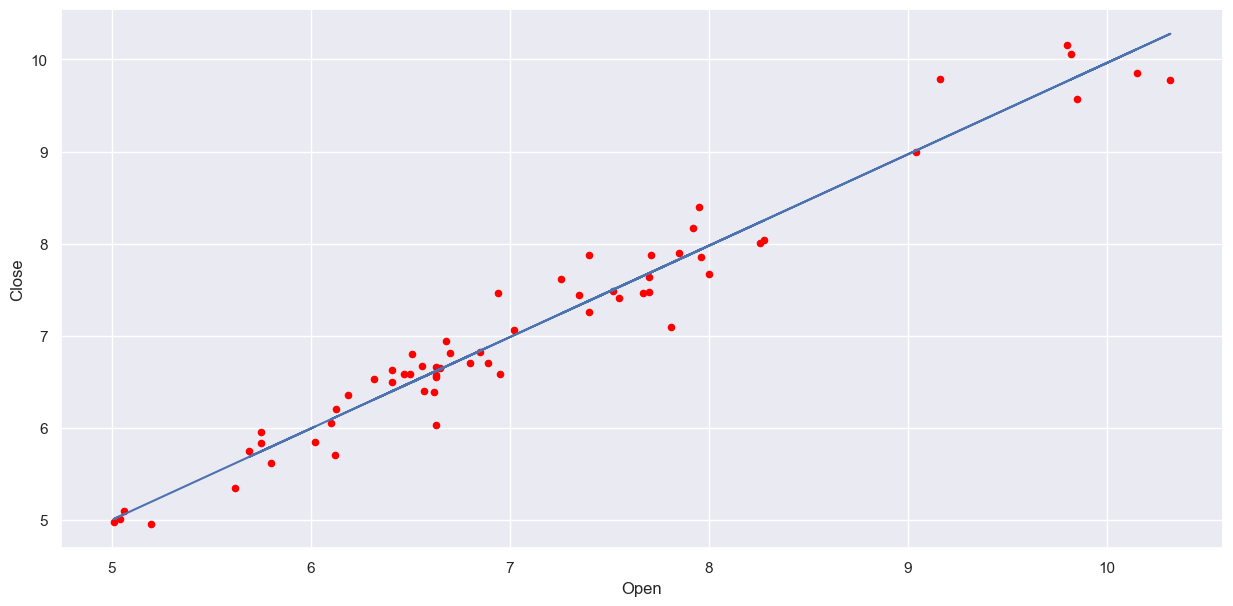

In [40]:
#scatter plot showing relationship between open and close prices
df_1.plot.scatter(x='Open',y='Close',c=('red'))
#obtaining the slop and intercept of regression line
x=df_1.Open
y=df_1.Close
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

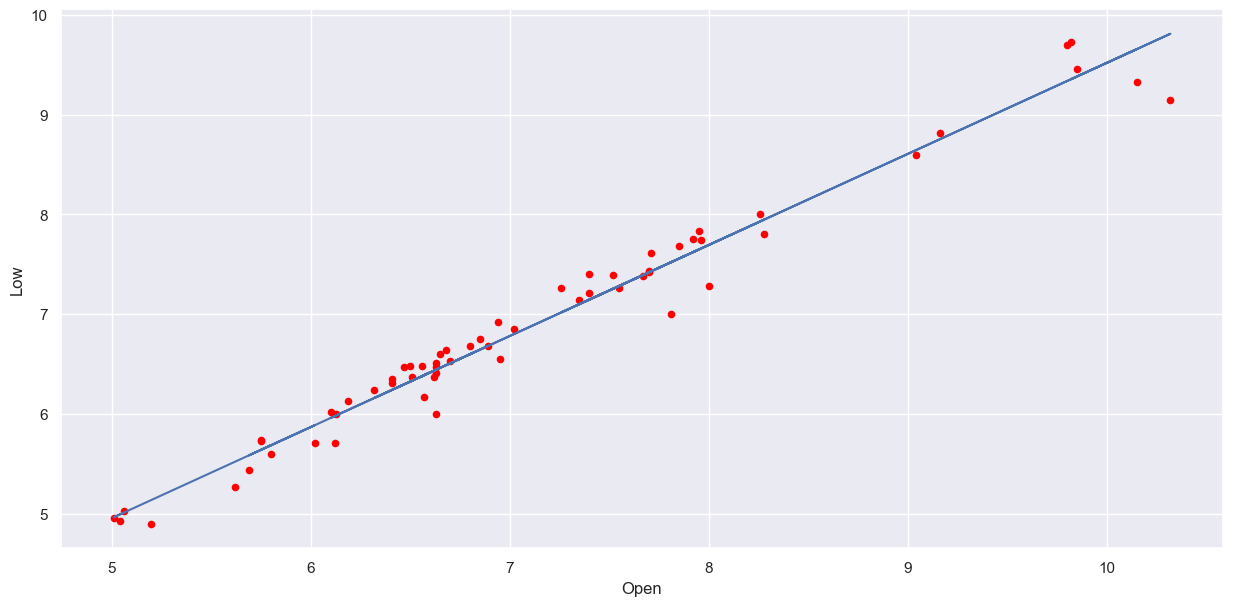

In [41]:
#scatter plot showing relationship between open and low prices
df_1.plot.scatter(x='Open',y='Low',c=('red'))
#obtaining the slop and intercept of regression line
x=df_1.Open
y=df_1.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

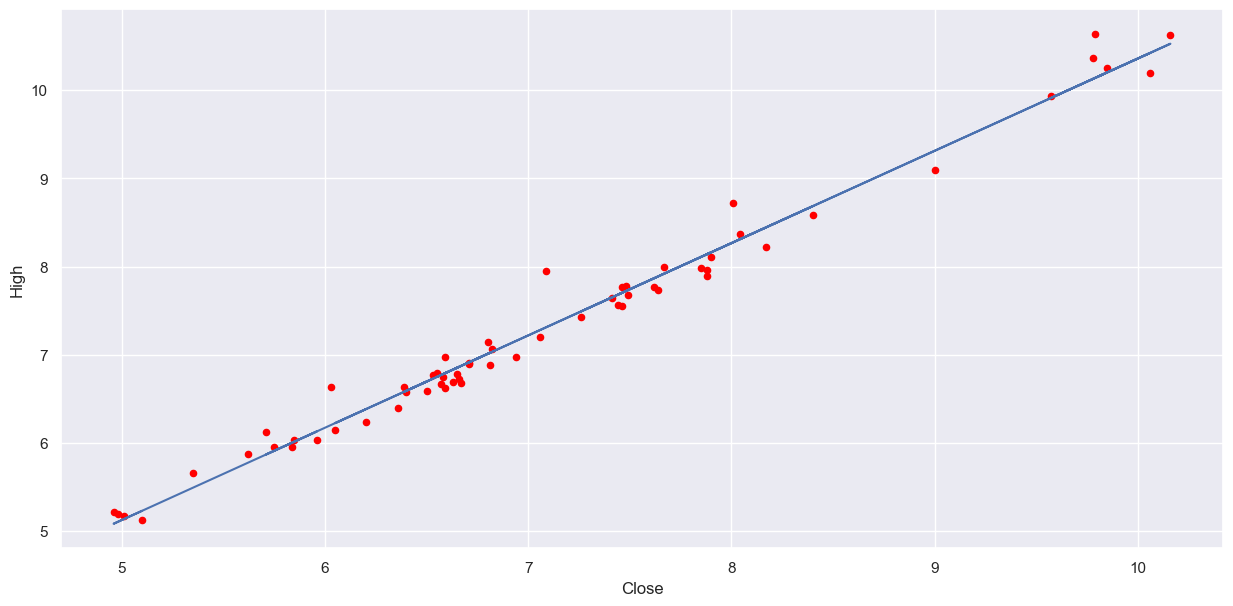

In [42]:
#scatter plot showing relationship between open and low prices
df_1.plot.scatter(x='Close',y='High',c=('red'))
#obtaining the slop and intercept of regression line
x=df_1.Close
y=df_1.High
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

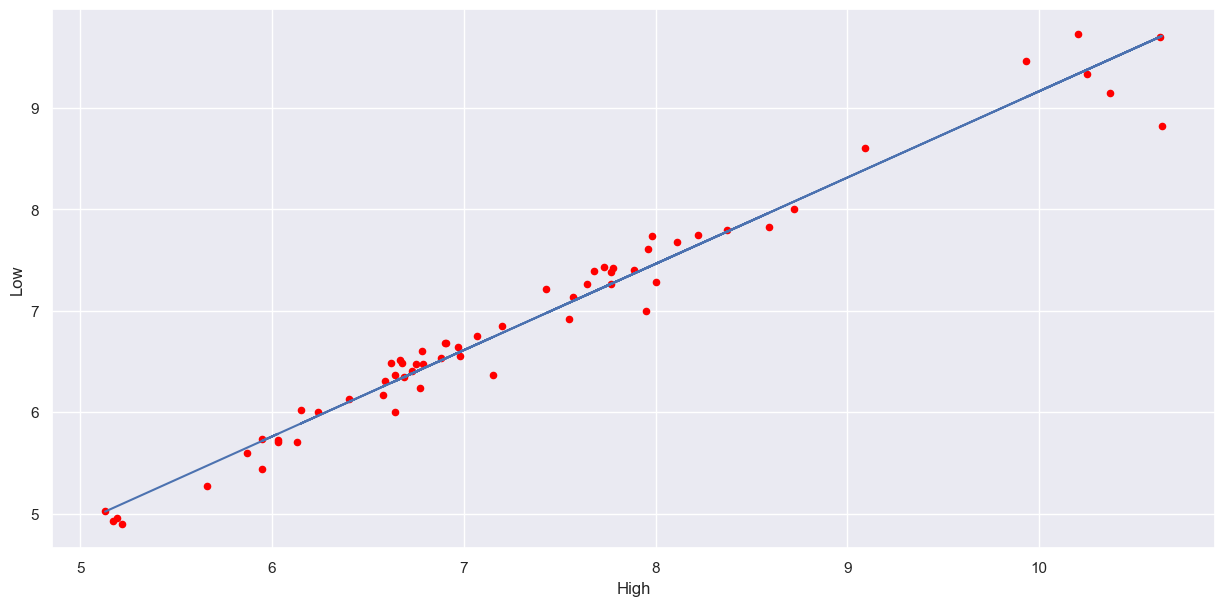

In [43]:
#scatter plot showing relationship between High and low prices
df_1.plot.scatter(x='High',y='Low',c=('red'))
#obtaining the slop and intercept of regression line
x=df_1.High
y=df_1.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

## 2nd Quarter

In [44]:
#loading data for second quarter
df_2=data["2019-4":"2019-6"]
df_2

Close  Open   Low  High    Volume    Weekday
timestamp                                               
2019-04-01   5.21  5.29  5.14  5.40  32404600     Monday
2019-04-02   5.39  5.43  5.35  5.61  55814800    Tuesday
2019-04-03   5.31  5.55  5.23  5.58  35197400  Wednesday
2019-04-04   5.35  5.39  5.27  5.50  31696600   Thursday
2019-04-05   5.36  5.37  5.31  5.40  18093400     Friday
...           ...   ...   ...   ...       ...        ...
2019-06-24   2.64  2.61  2.51  2.69  22693900     Monday
2019-06-25   2.60  2.64  2.55  2.66  16273100    Tuesday
2019-06-26   2.55  2.64  2.54  2.73  20679300  Wednesday
2019-06-27   2.60  2.51  2.44  2.62  27685600   Thursday
2019-06-28   2.55  2.60  2.51  2.63  17640300     Friday

[63 rows x 6 columns]

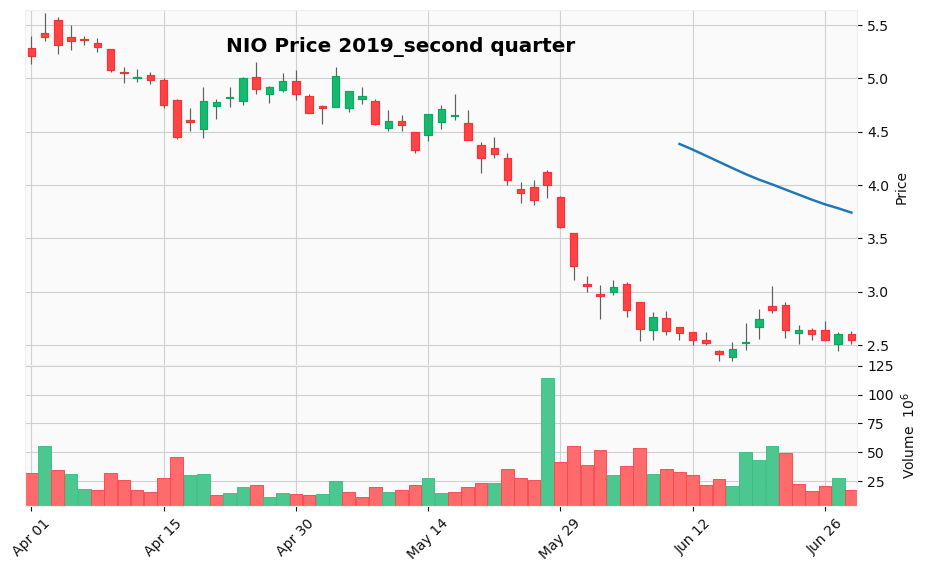

In [45]:
#Plotting Candle chart for second quarter of 2019
mpf.plot(df_2,type='candle',mav=(50),
         title='NIO Price 2019_second quarter',volume=True,style='yahoo',
         figratio=(20,12),tight_layout=True)


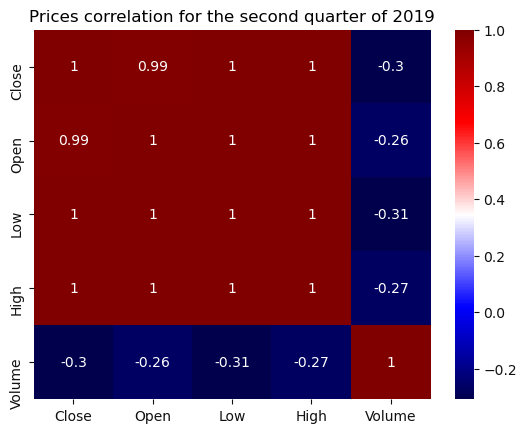

           Close      Open       Low      High    Volume
Close   1.000000  0.991487  0.997439  0.996301 -0.304079
Open    0.991487  1.000000  0.995448  0.996892 -0.264245
Low     0.997439  0.995448  1.000000  0.996683 -0.307680
High    0.996301  0.996892  0.996683  1.000000 -0.268963
Volume -0.304079 -0.264245 -0.307680 -0.268963  1.000000


In [46]:
#finding the correlation between the prices for the month of january
second_quarter_corr=df_2.corr()
sns.heatmap(second_quarter_corr,annot=True,cmap="seismic",
           xticklabels=second_quarter_corr.columns.values,
           yticklabels=second_quarter_corr.columns.values)
plt.title('Prices correlation for the second quarter of 2019')
plt.show()
print(second_quarter_corr)

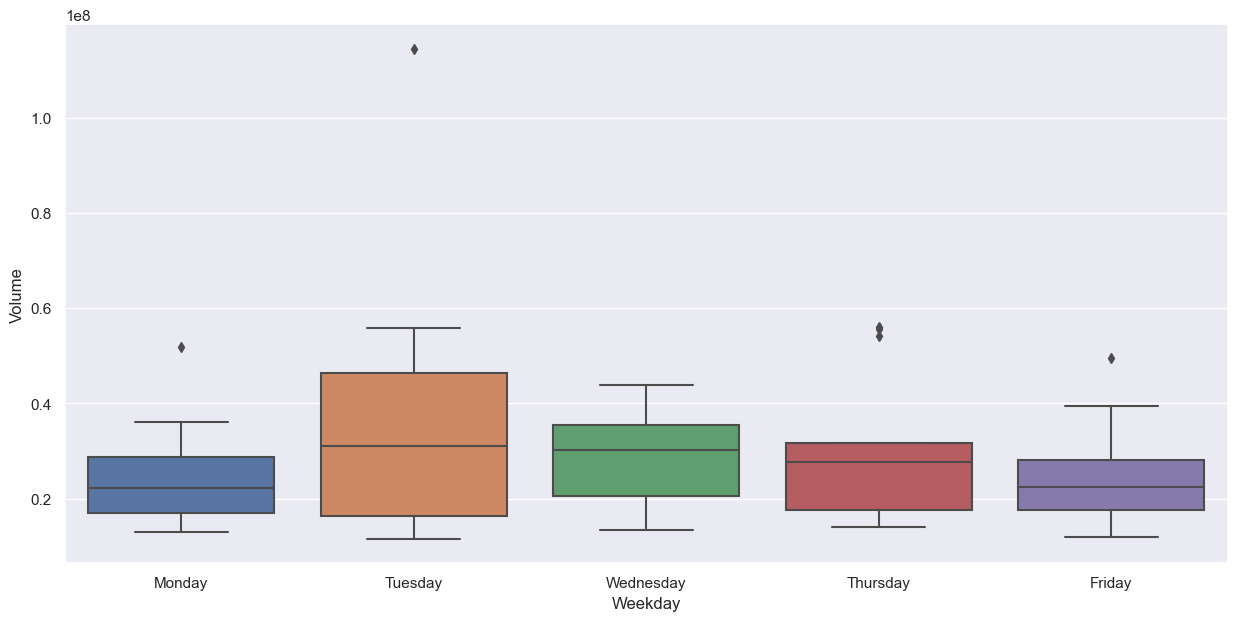

In [47]:
#checking out volume traded on each day of the week for the second quarter
order=['Monday','Tuesday','Wednesday','Thursday','Friday']
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(data=df_2,x='Weekday',y='Volume',order=order);


### checking for outliers in each column

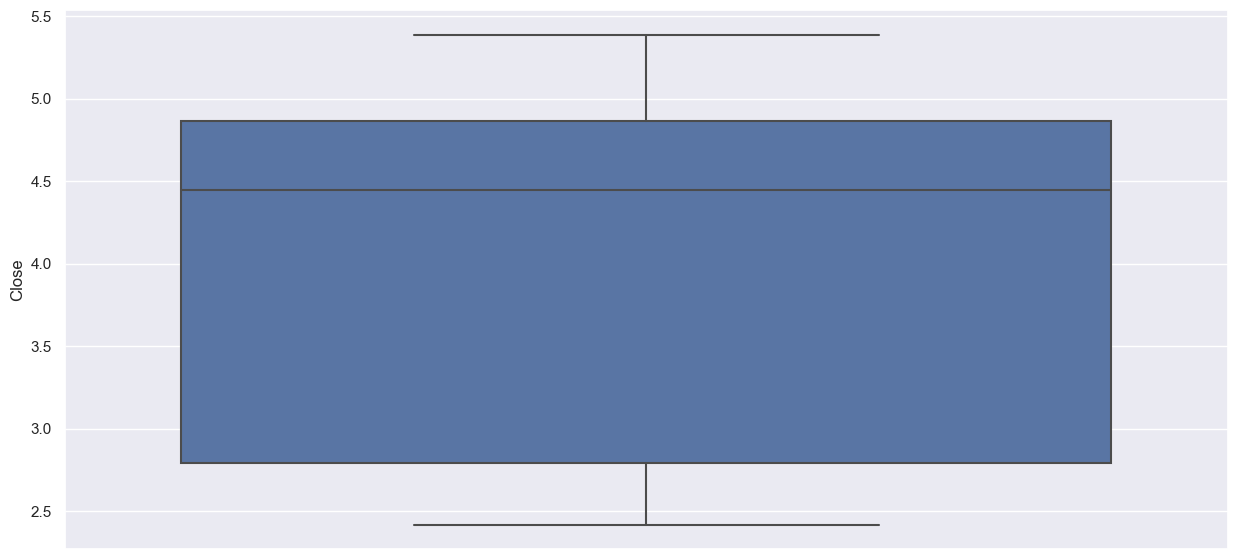

In [48]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_2['Close']);
plt.show()

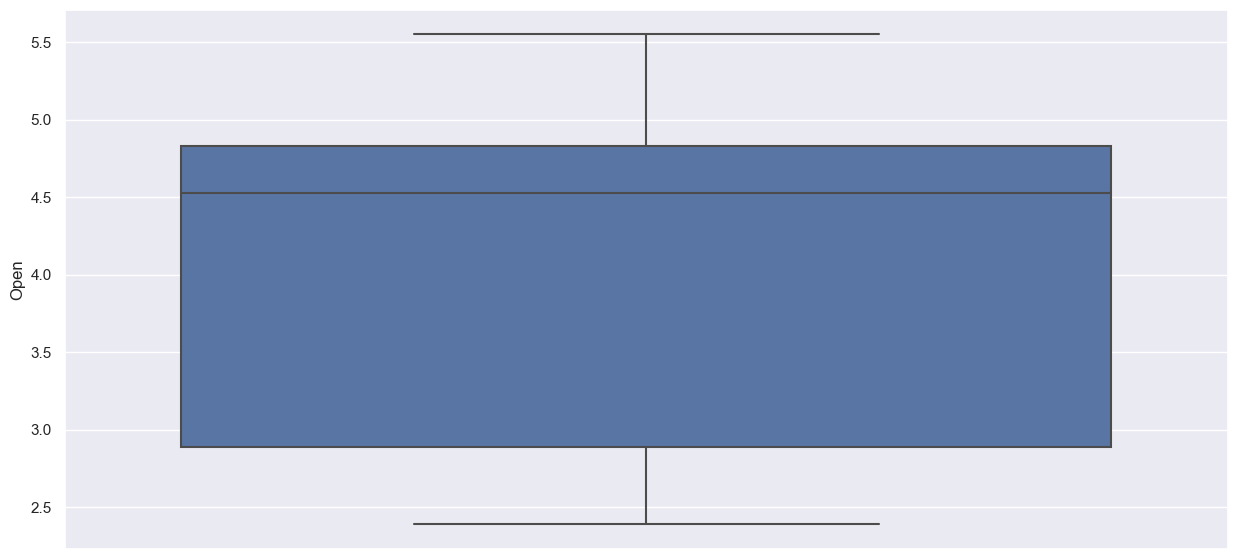

In [49]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_2['Open']);
plt.show()

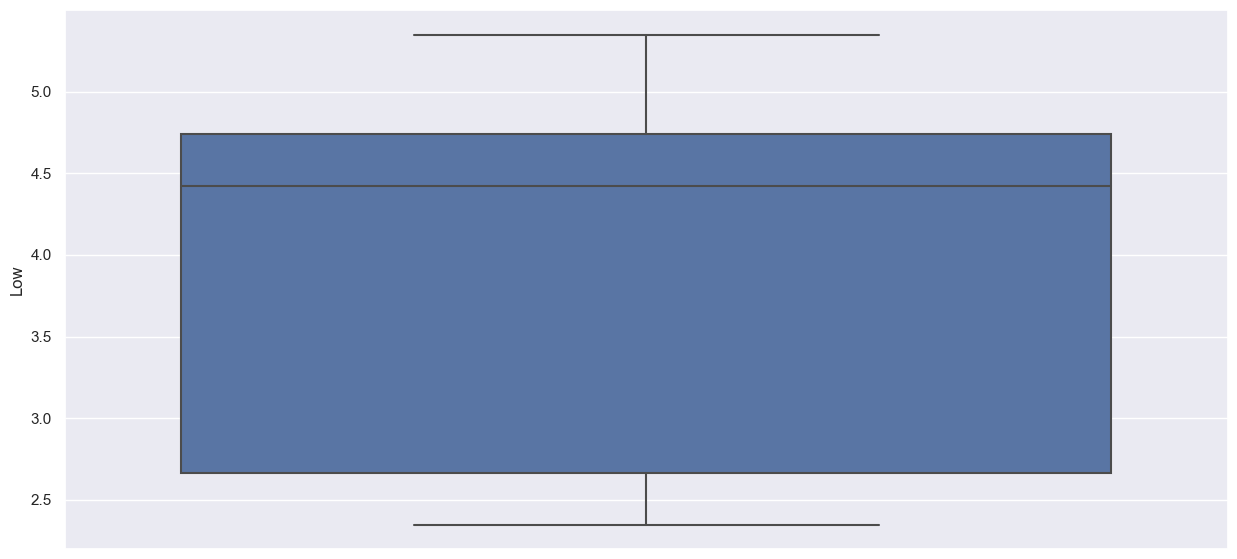

In [50]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_2['Low']);
plt.show()

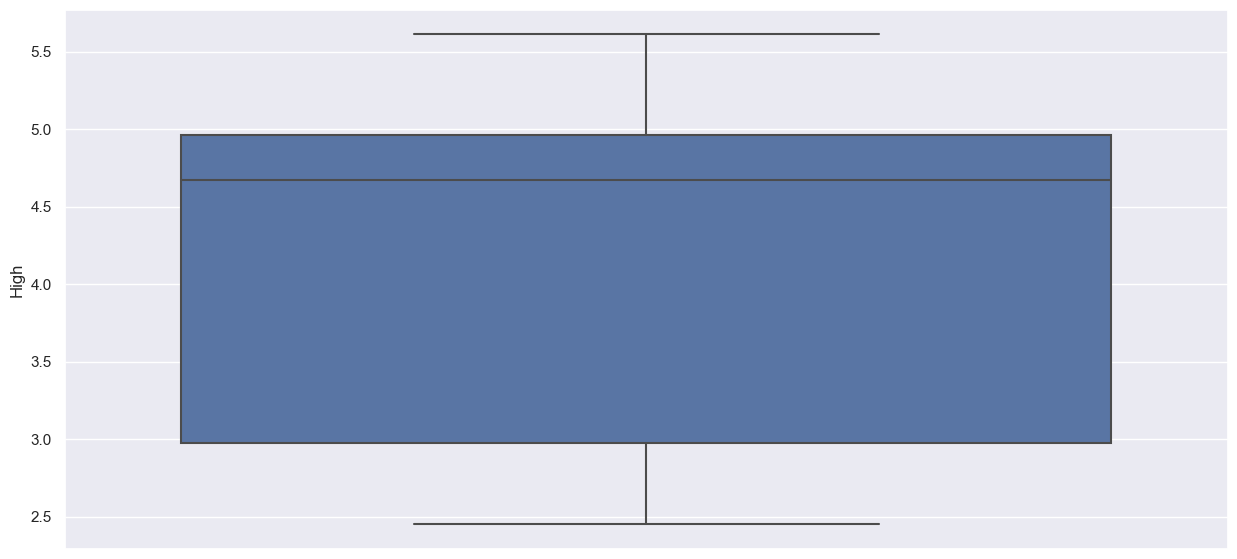

In [51]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_2['High']);
plt.show()

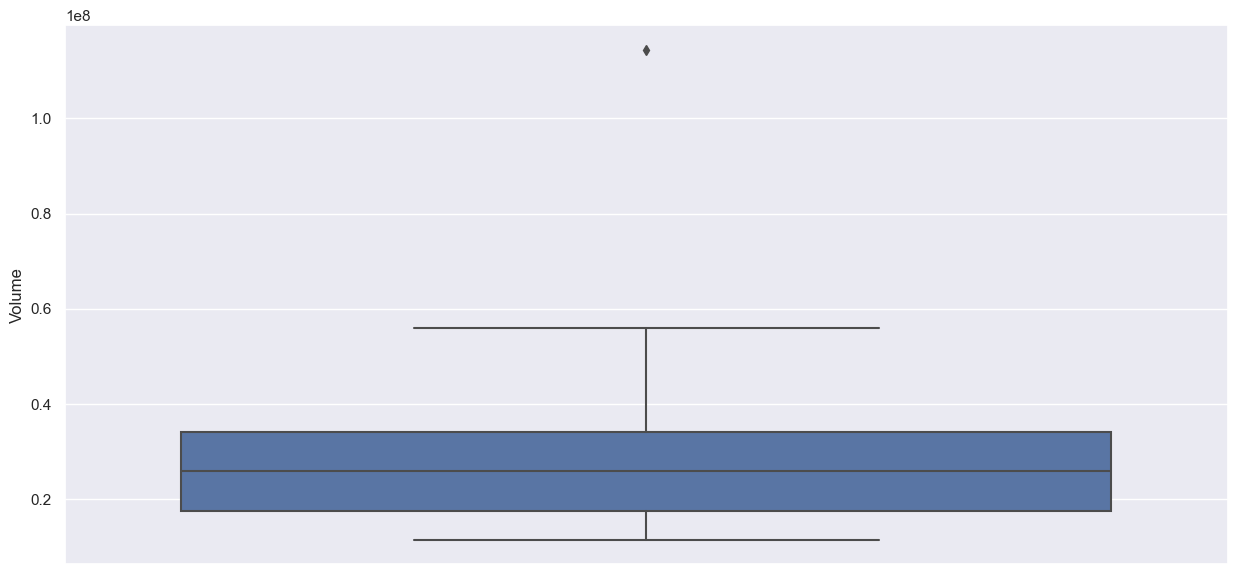

In [52]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_2['Volume']);
plt.show()

### scatter plot showing relationship between each column

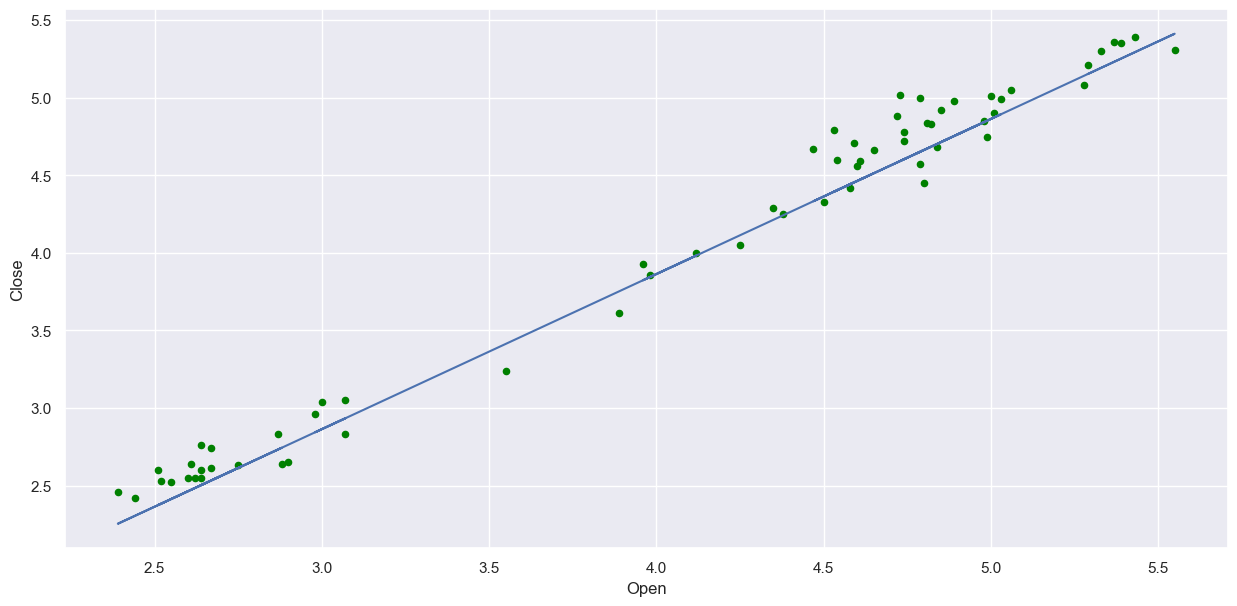

In [53]:
#scatter plot showing relationship between open and close prices
df_2.plot.scatter(x='Open',y='Close',c=('green'))
#obtaining the slop and intercept of regression line
x=df_2.Open
y=df_2.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

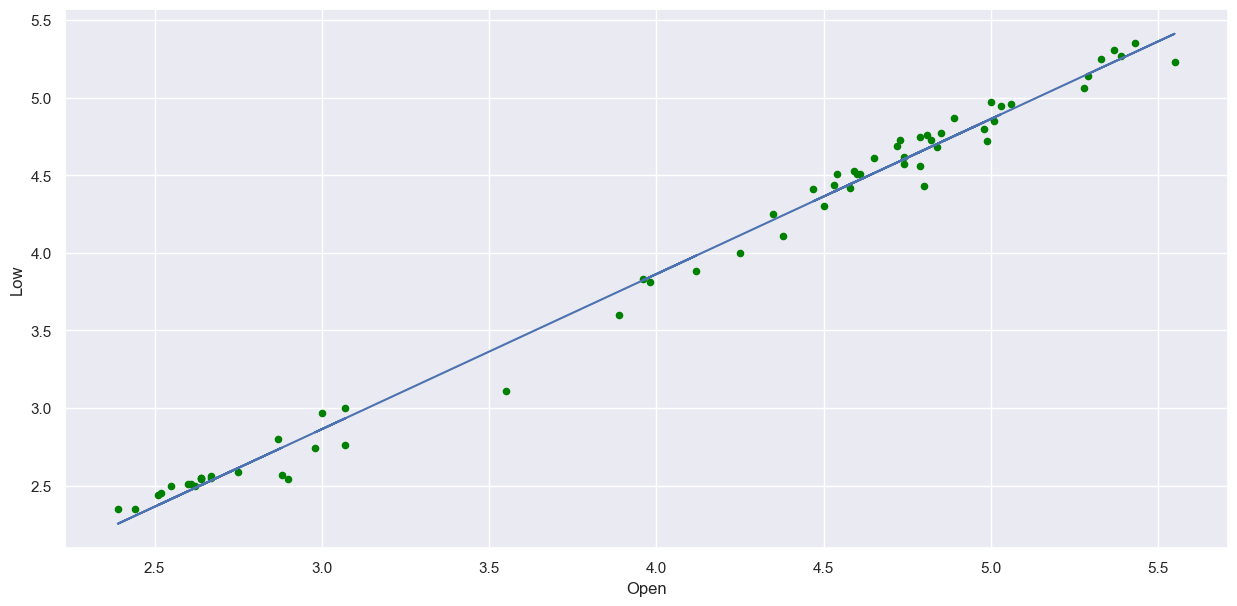

In [54]:
#scatter plot showing relationship between open and low prices
df_2.plot.scatter(x='Open',y='Low',c=('green'))
#obtaining the slop and intercept of regression line
x=df_2.Open
y=df_2.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

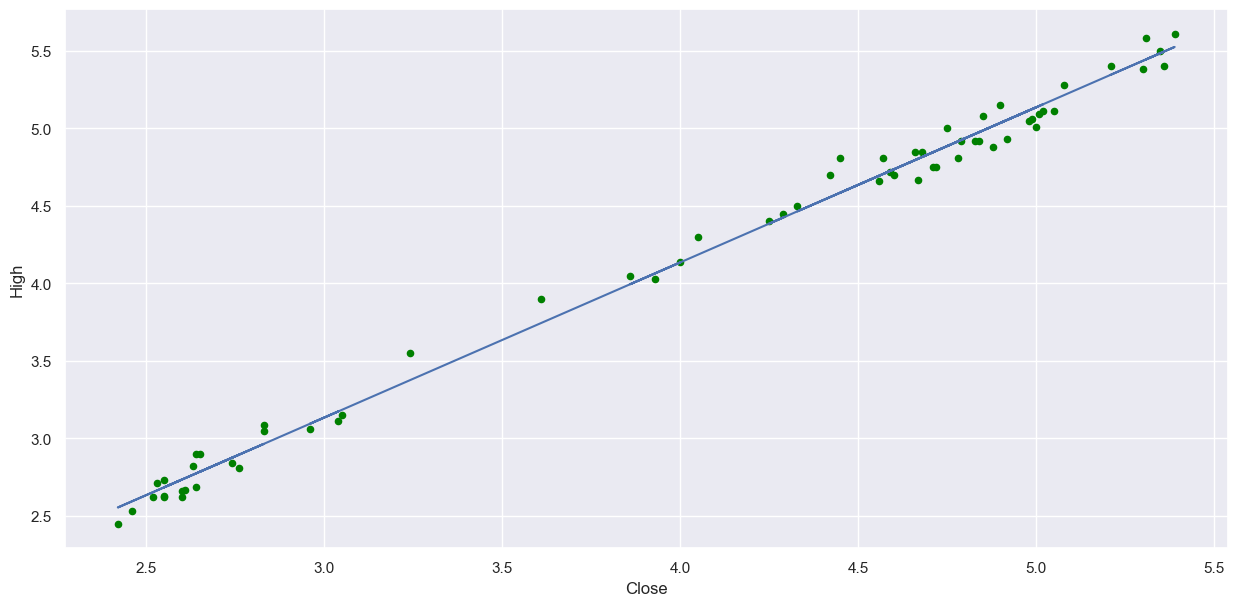

In [55]:
#scatter plot showing relationship between close and high prices
df_2.plot.scatter(x='Close',y='High',c=('green'))
#obtaining the slop and intercept of regression line
x=df_2.Close
y=df_2.High
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

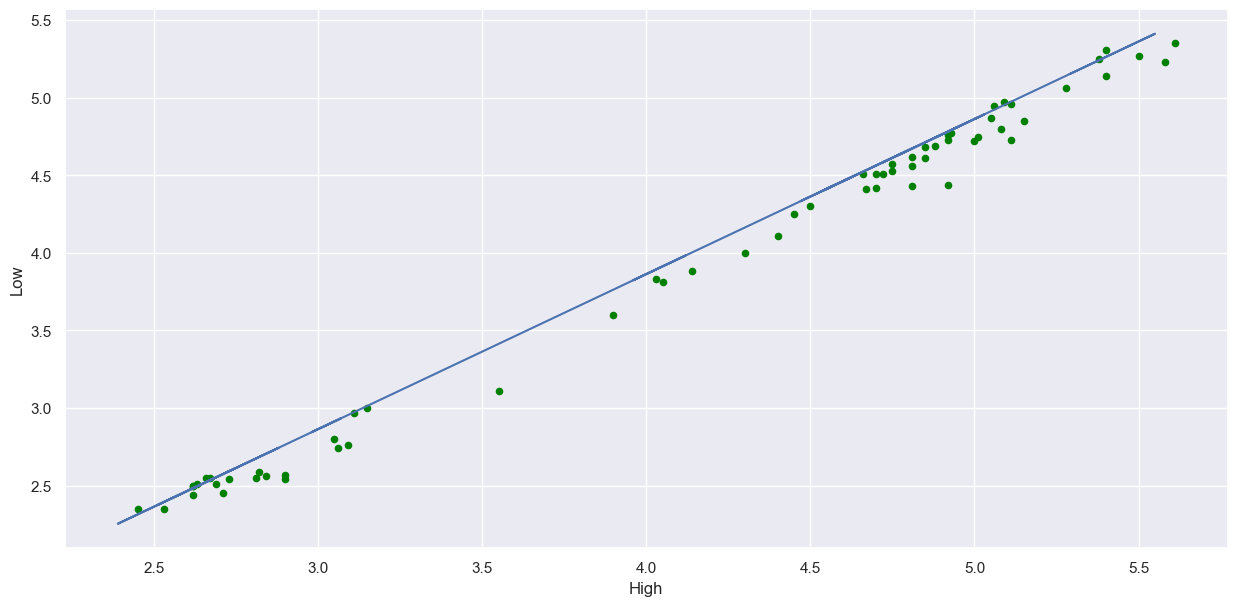

In [56]:
#scatter plot showing relationship between high and low prices
df_2.plot.scatter(x='High',y='Low',c=('green'))
#obtaining the slop and intercept of regression line
x=df_2.Open
y=df_2.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

## 3rd Quarter

In [57]:
#loading data for second quarter
df_3=data["2019-7":"2019-9"]
df_3

Close  Open   Low  High     Volume    Weekday
timestamp                                                
2019-07-01   2.60  2.67  2.58  2.68   19462800     Monday
2019-07-02   2.82  2.60  2.57  2.85   35317300    Tuesday
2019-07-03   3.13  2.93  2.90  3.29   75342400  Wednesday
2019-07-05   3.26  3.31  3.15  3.34   35914600     Friday
2019-07-08   3.49  3.21  3.13  3.50   40424000     Monday
...           ...   ...   ...   ...        ...        ...
2019-09-24   2.17  2.22  1.97  2.24  122194400    Tuesday
2019-09-25   2.05  2.15  2.02  2.15   38938700  Wednesday
2019-09-26   1.96  2.05  1.90  2.06   50967800   Thursday
2019-09-27   1.75  1.94  1.71  2.00   59824600     Friday
2019-09-30   1.56  1.72  1.53  1.73   58815600     Monday

[64 rows x 6 columns]

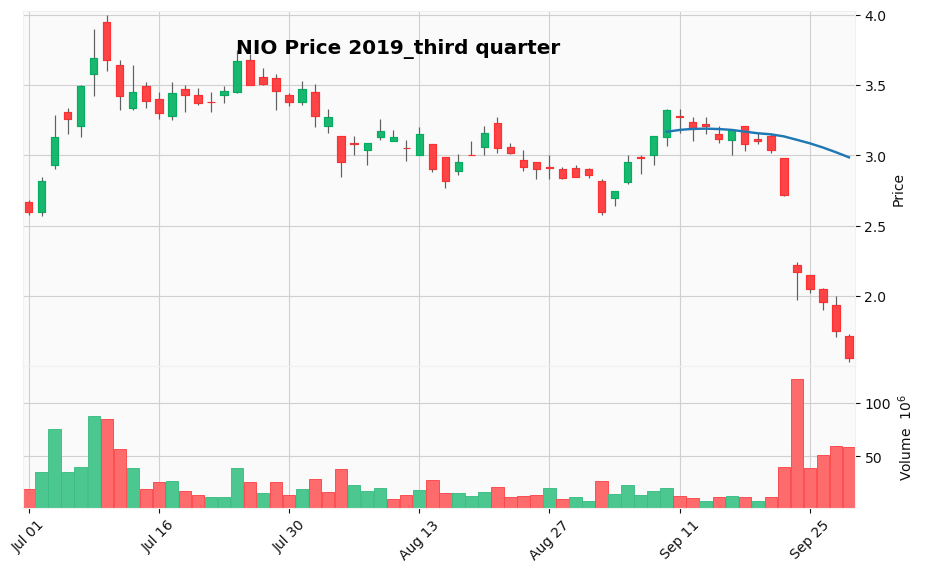

In [58]:
#Plotting Candle chart for second quarter of 2019
mpf.plot(df_3,type='candle',mav=(50),
         title='NIO Price 2019_third quarter',volume=True,style='yahoo',
         figratio=(20,12),tight_layout=True)


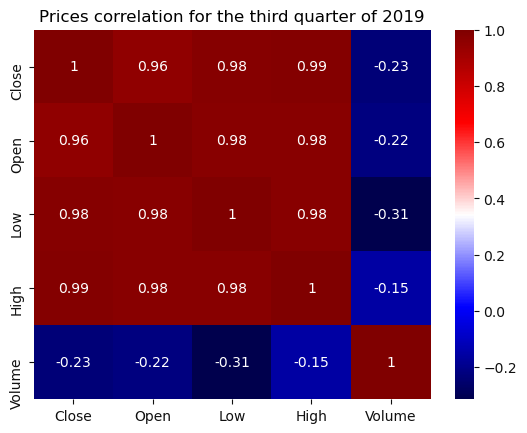

           Close      Open       Low      High    Volume
Close   1.000000  0.957243  0.983305  0.985143 -0.234639
Open    0.957243  1.000000  0.978729  0.978174 -0.217833
Low     0.983305  0.978729  1.000000  0.978500 -0.314530
High    0.985143  0.978174  0.978500  1.000000 -0.151631
Volume -0.234639 -0.217833 -0.314530 -0.151631  1.000000


In [59]:
#finding the correlation between the prices for the month of january
third_quarter_corr=df_3.corr()
sns.heatmap(third_quarter_corr,annot=True,cmap="seismic",
           xticklabels=third_quarter_corr.columns.values,
           yticklabels=third_quarter_corr.columns.values)
plt.title('Prices correlation for the third quarter of 2019')
plt.show()
print(third_quarter_corr)

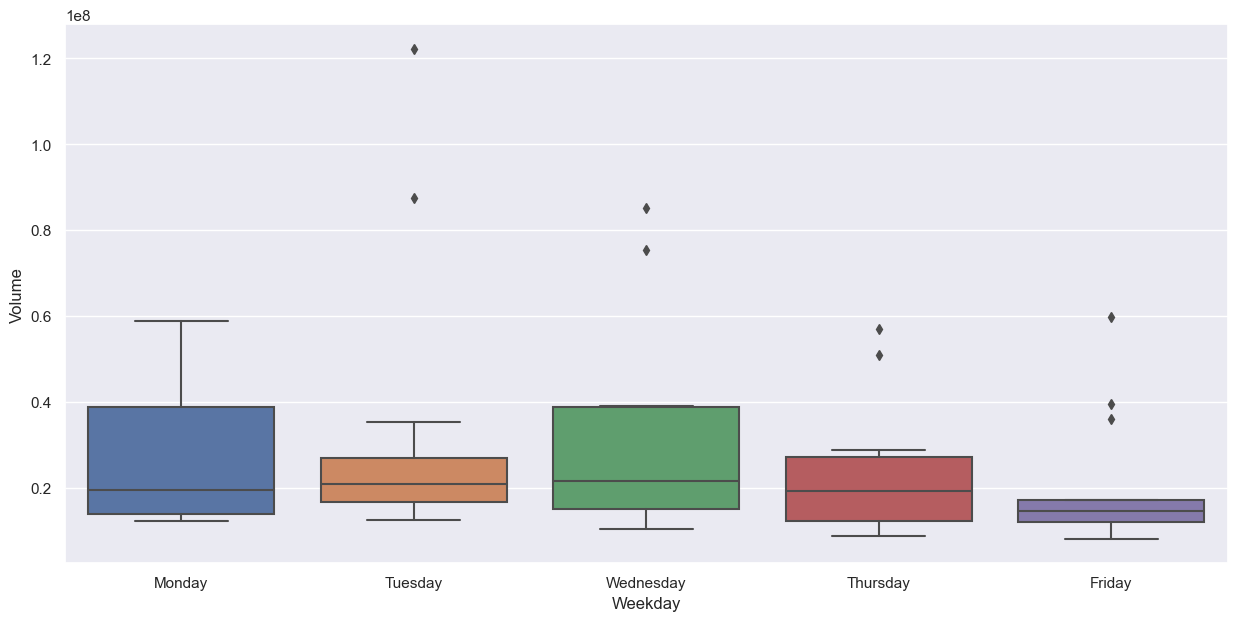

In [60]:
#checking out volume traded on each day of the week for the second quarter
order=['Monday','Tuesday','Wednesday','Thursday','Friday']
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(data=df_3,x='Weekday',y='Volume',order=order);


### checking for outliers in each column

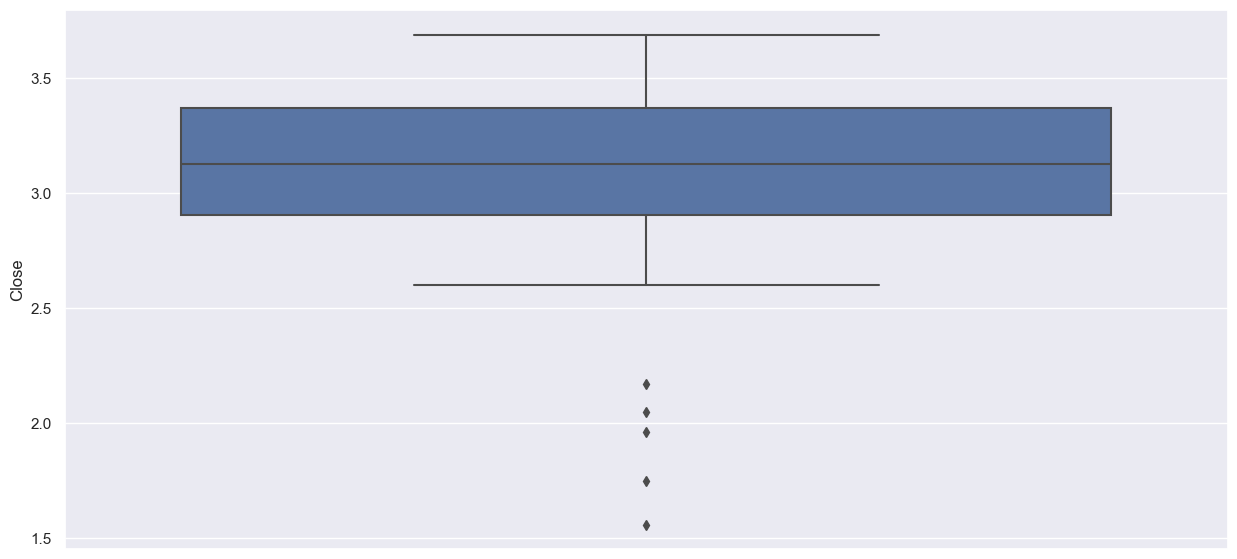

In [61]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_3['Close']);
plt.show()

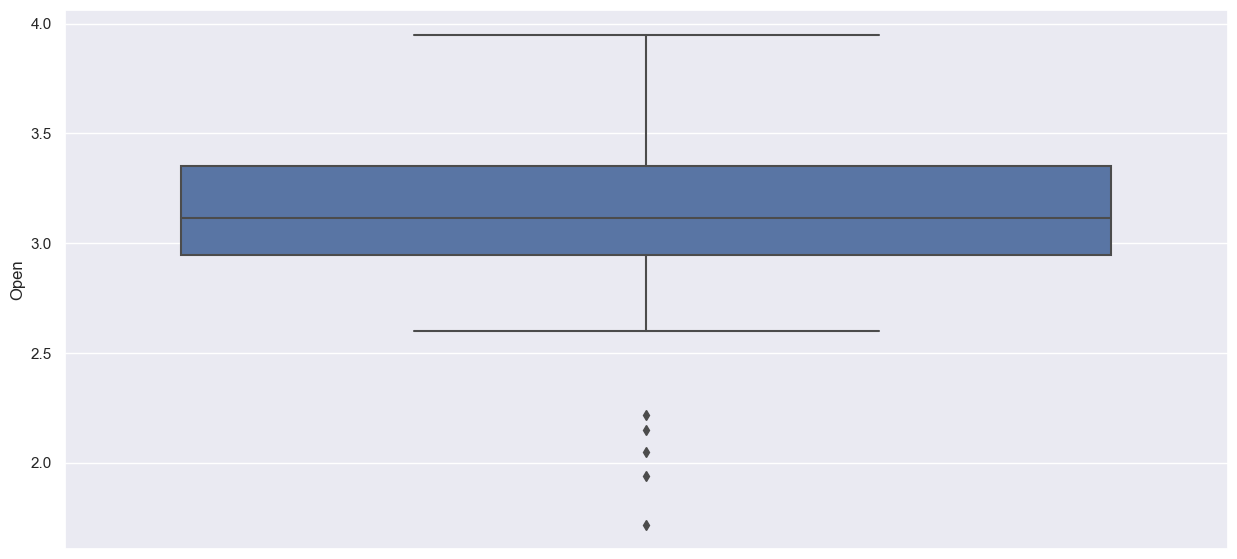

In [62]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_3['Open']);
plt.show()

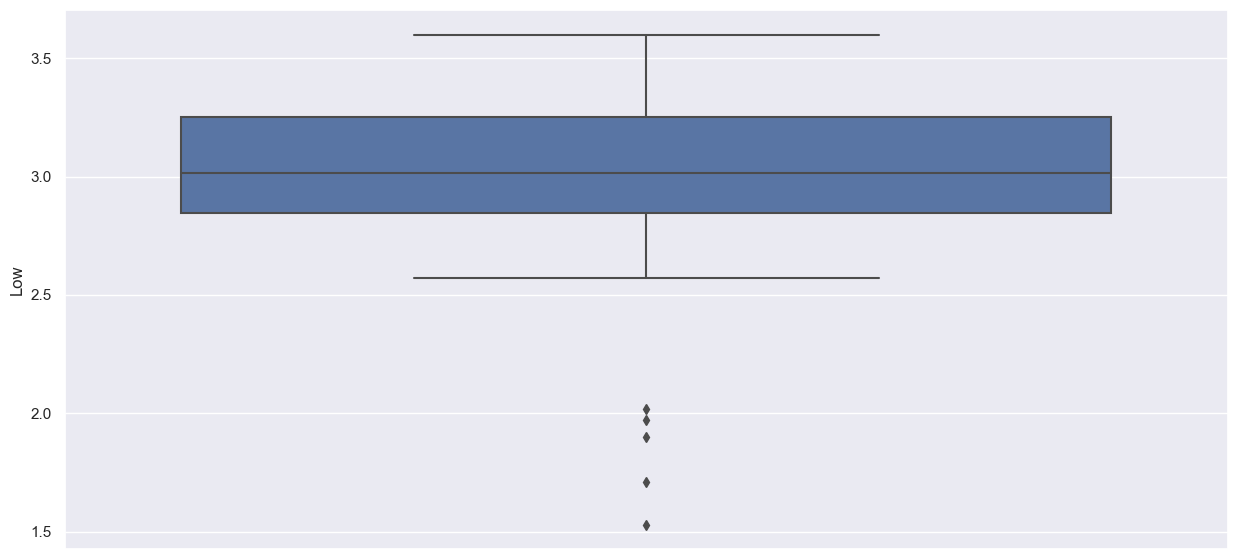

In [63]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_3['Low']);
plt.show()

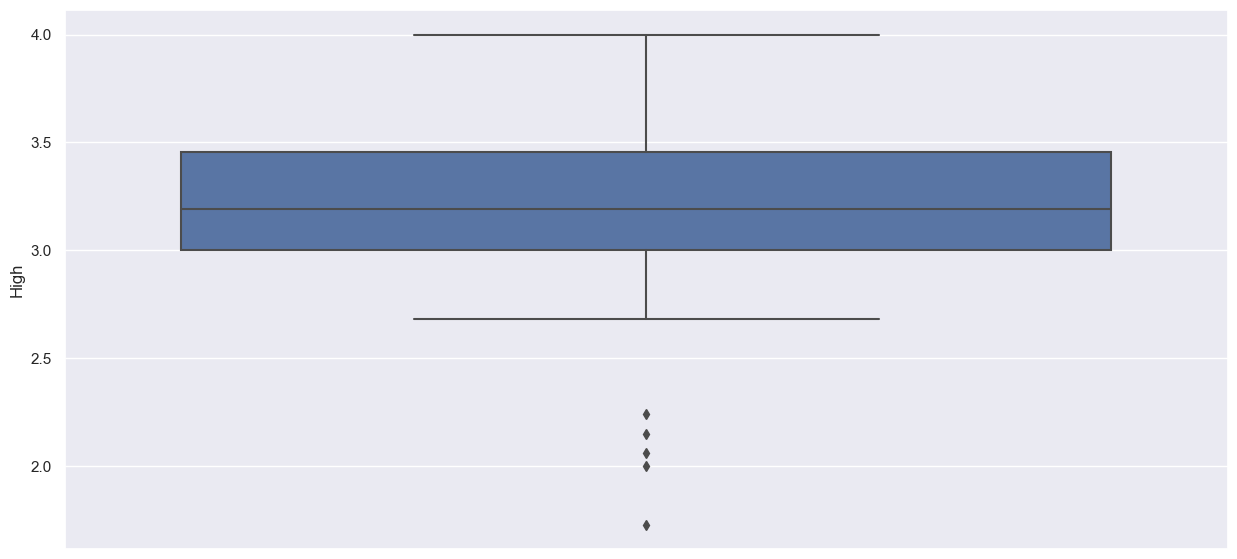

In [64]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_3['High']);
plt.show()

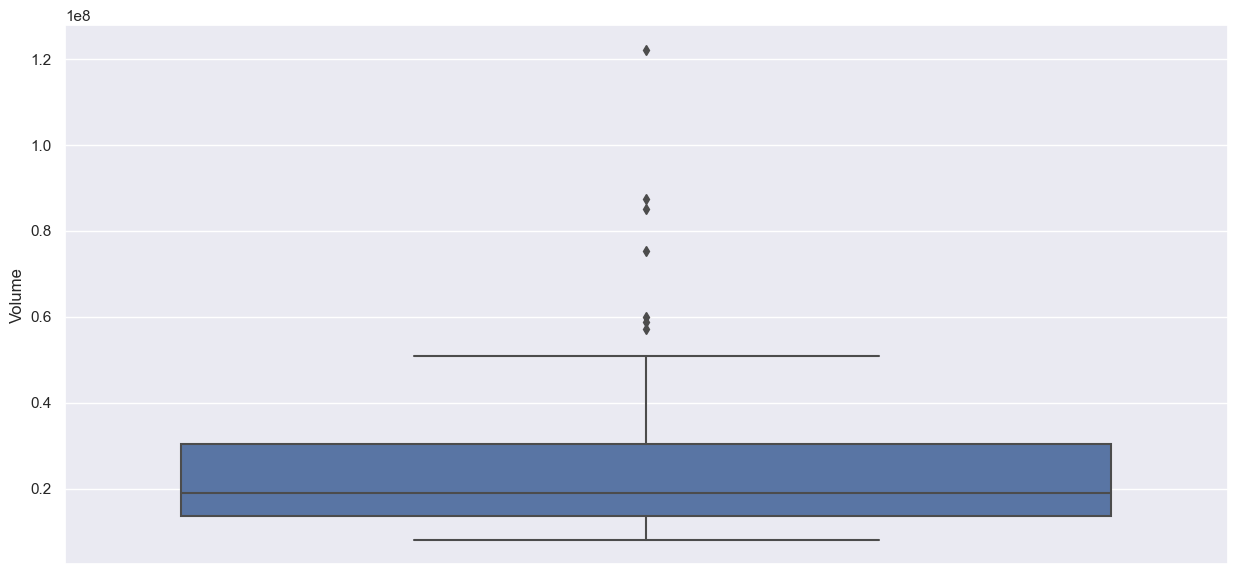

In [65]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_3['Volume']);
plt.show()

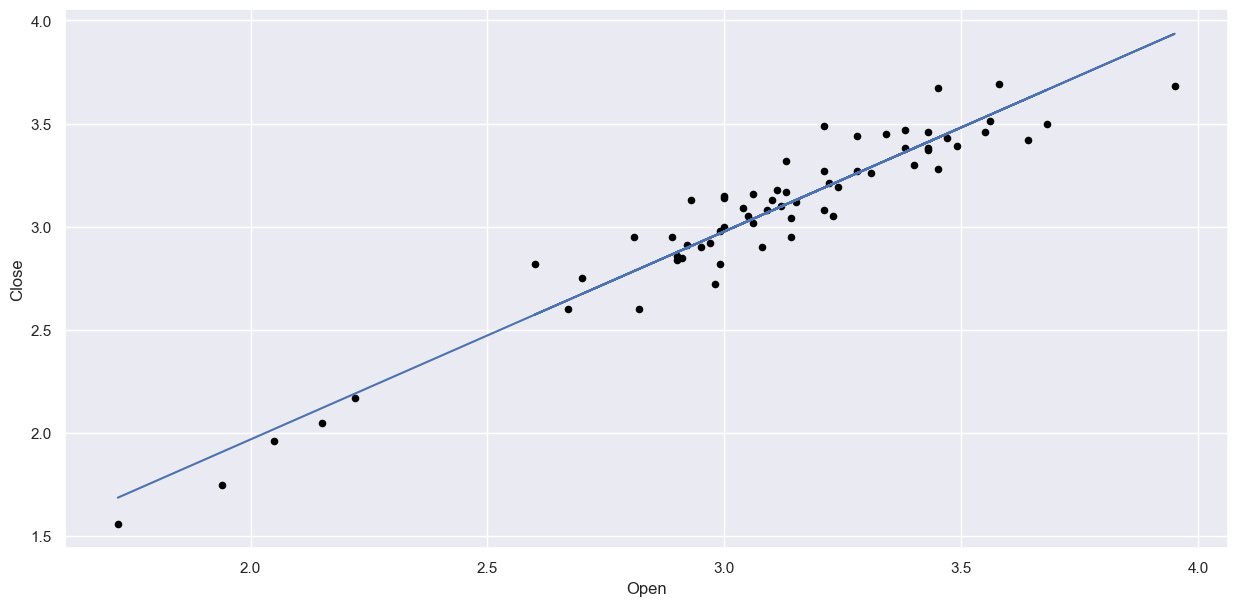

In [66]:
#scatter plot showing relationship between open and lowclose prices
df_3.plot.scatter(x='Open',y='Close',c=('black'))
#obtaining the slop and intercept of regression line
x=df_3.Open
y=df_3.Close
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

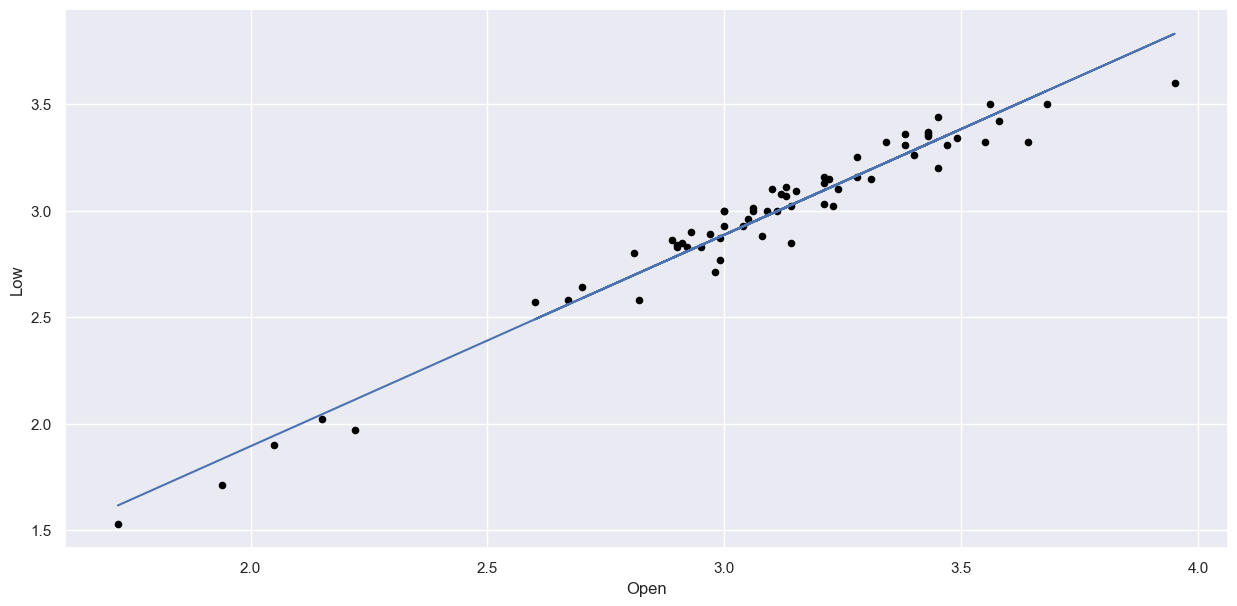

In [67]:
#scatter plot showing relationship between open and low prices
df_3.plot.scatter(x='Open',y='Low',c=('black'))
#obtaining the slop and intercept of regression line
x=df_3.Open
y=df_3.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

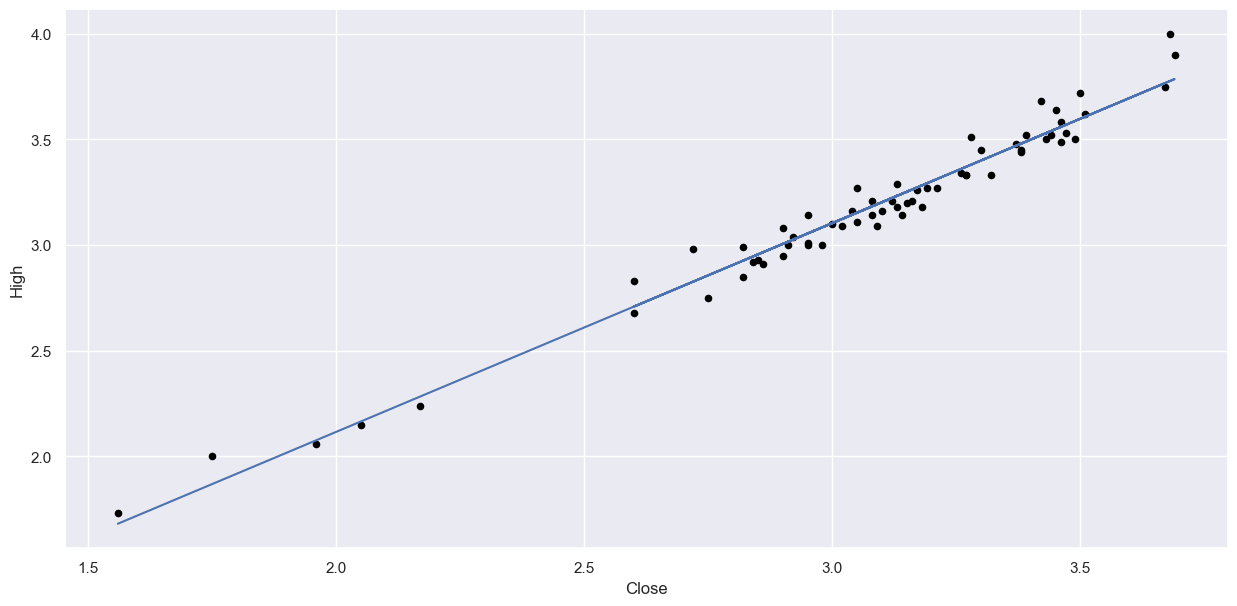

In [68]:
#scatter plot showing relationship between close and high prices
df_3.plot.scatter(x='Close',y='High',c=('black'))
#obtaining the slop and intercept of regression line
x=df_3.Close
y=df_3.High
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

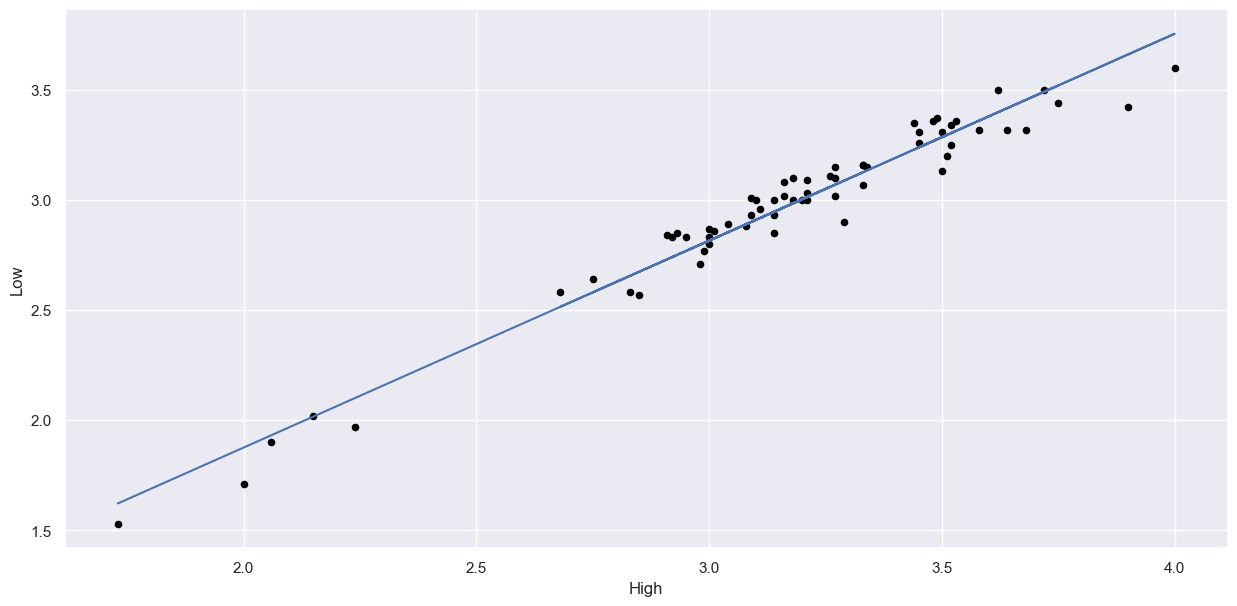

In [69]:
#scatter plot showing relationship between high and low prices
df_3.plot.scatter(x='High',y='Low',c=('black'))
#obtaining the slop and intercept of regression line
x=df_3.High
y=df_3.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

## 4th quarter

In [70]:
#loading data for second quarter
df_4=data["2019-10":"2019-12"]
df_4

Close  Open   Low  High     Volume    Weekday
timestamp                                                
2019-10-01   1.32  1.51  1.22  1.51   88123600    Tuesday
2019-10-02   1.59  1.19  1.19  1.65   98992700  Wednesday
2019-10-03   1.64  1.59  1.43  1.70   58630100   Thursday
2019-10-04   1.62  1.60  1.56  1.69   25240300     Friday
2019-10-07   1.55  1.58  1.45  1.59   26893500     Monday
...           ...   ...   ...   ...        ...        ...
2019-12-24   2.53  2.63  2.45  2.63   32029800    Tuesday
2019-12-26   2.51  2.45  2.35  2.52   44173700   Thursday
2019-12-27   2.42  2.54  2.41  2.55   37553300     Friday
2019-12-30   3.72  2.92  2.88  4.87  432720700     Monday
2019-12-31   4.02  4.15  3.82  4.42  215008600    Tuesday

[64 rows x 6 columns]

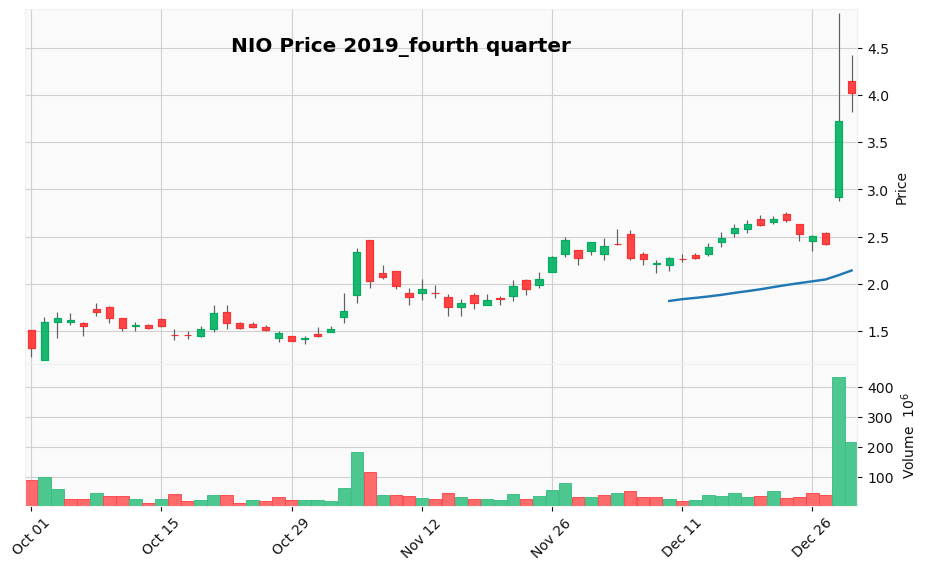

In [71]:
#Plotting Candle chart for second quarter of 2019
mpf.plot(df_4,type='candle',mav=(50),
         title='NIO Price 2019_fourth quarter',volume=True,style='yahoo',
         figratio=(20,12),tight_layout=True)


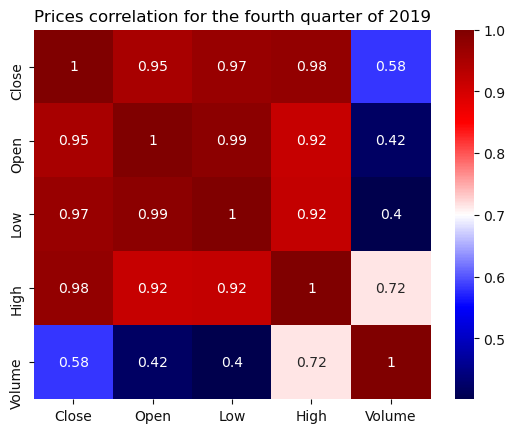

           Close      Open       Low      High    Volume
Close   1.000000  0.952202  0.970458  0.975103  0.582436
Open    0.952202  1.000000  0.985142  0.916219  0.420824
Low     0.970458  0.985142  1.000000  0.919824  0.401320
High    0.975103  0.916219  0.919824  1.000000  0.715497
Volume  0.582436  0.420824  0.401320  0.715497  1.000000


In [72]:
#finding the correlation between the prices for the month of january
fourth_quarter_corr=df_4.corr()
sns.heatmap(fourth_quarter_corr,annot=True,cmap="seismic",
           xticklabels=fourth_quarter_corr.columns.values,
           yticklabels=fourth_quarter_corr.columns.values)
plt.title('Prices correlation for the fourth quarter of 2019')
plt.show()
print(fourth_quarter_corr)

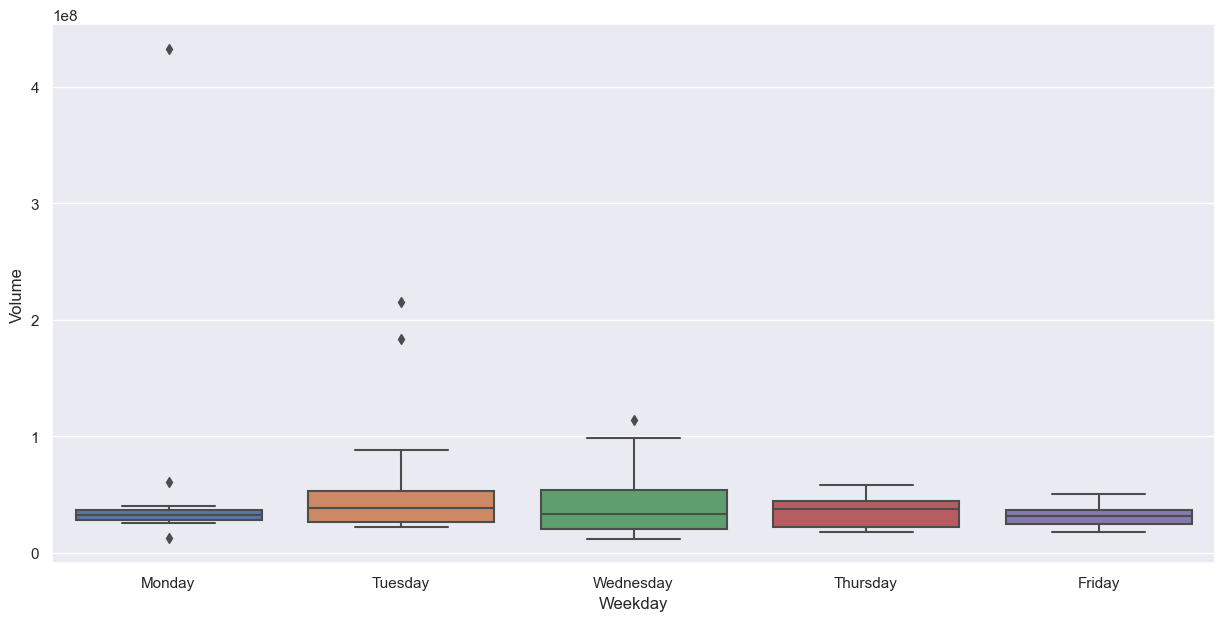

In [73]:
#checking out volume traded on each day of the week for the second quarter
order=['Monday','Tuesday','Wednesday','Thursday','Friday']
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(data=df_4,x='Weekday',y='Volume',order=order);


### checking for outliers in each column

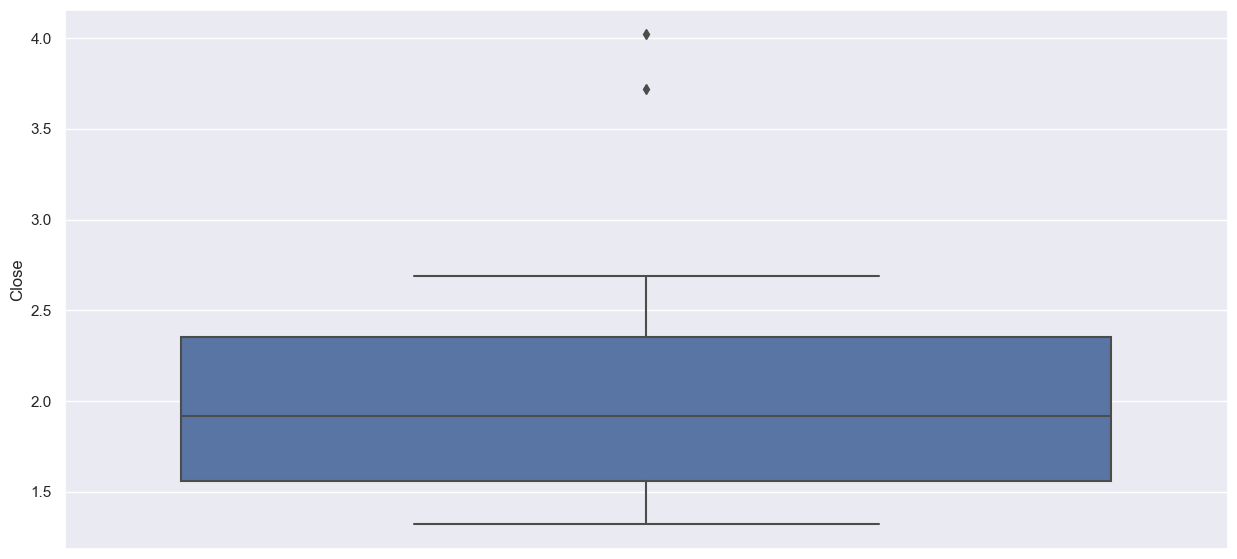

In [74]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_4['Close']);
plt.show()

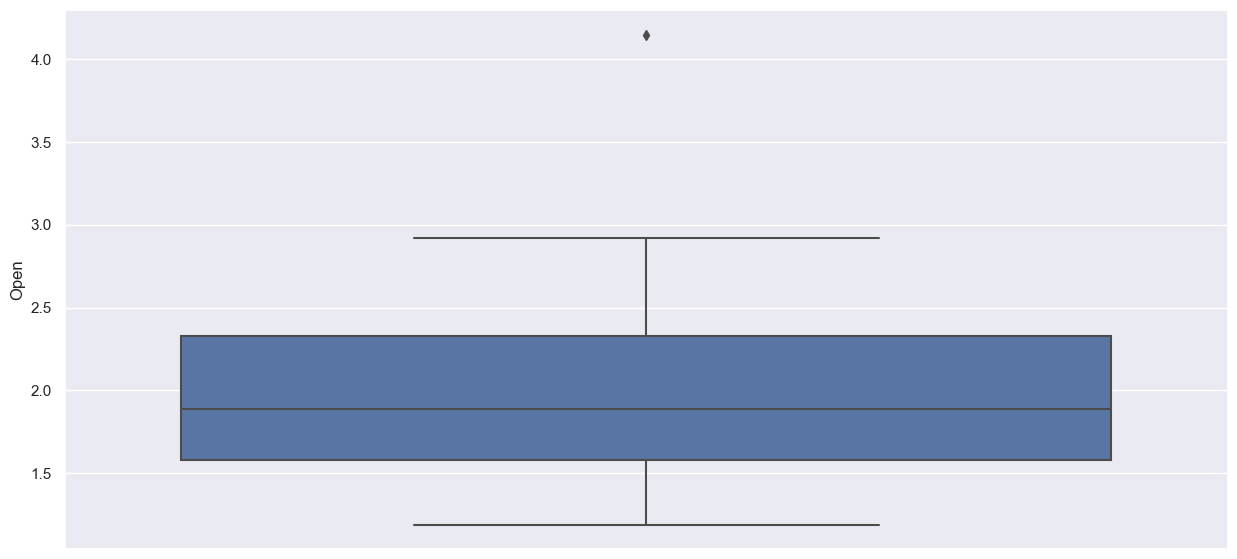

In [75]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_4['Open']);
plt.show()

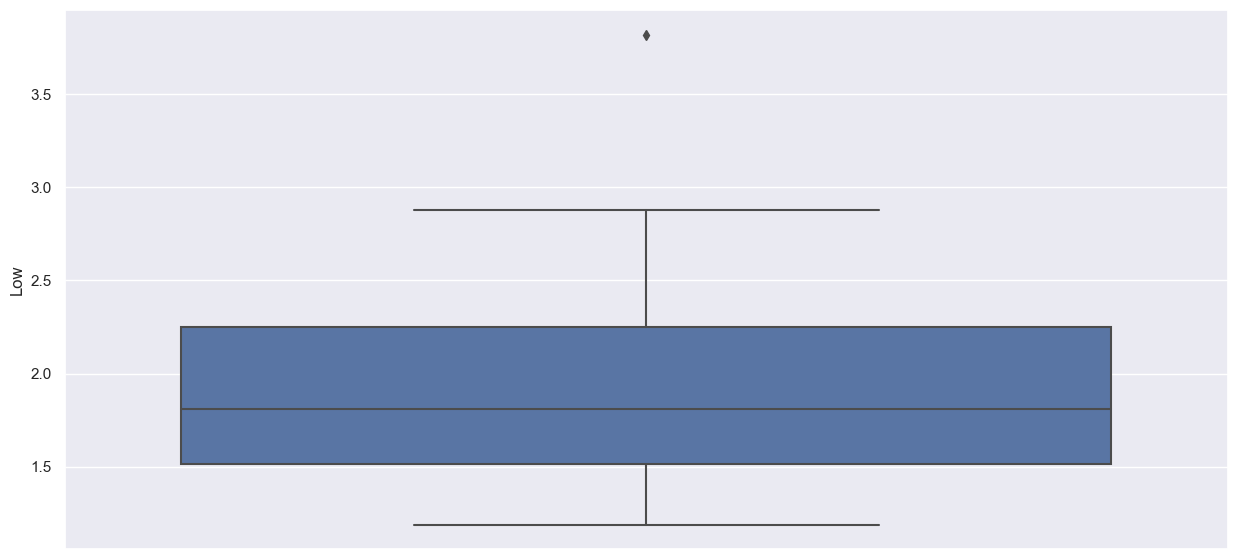

In [76]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_4['Low']);
plt.show()

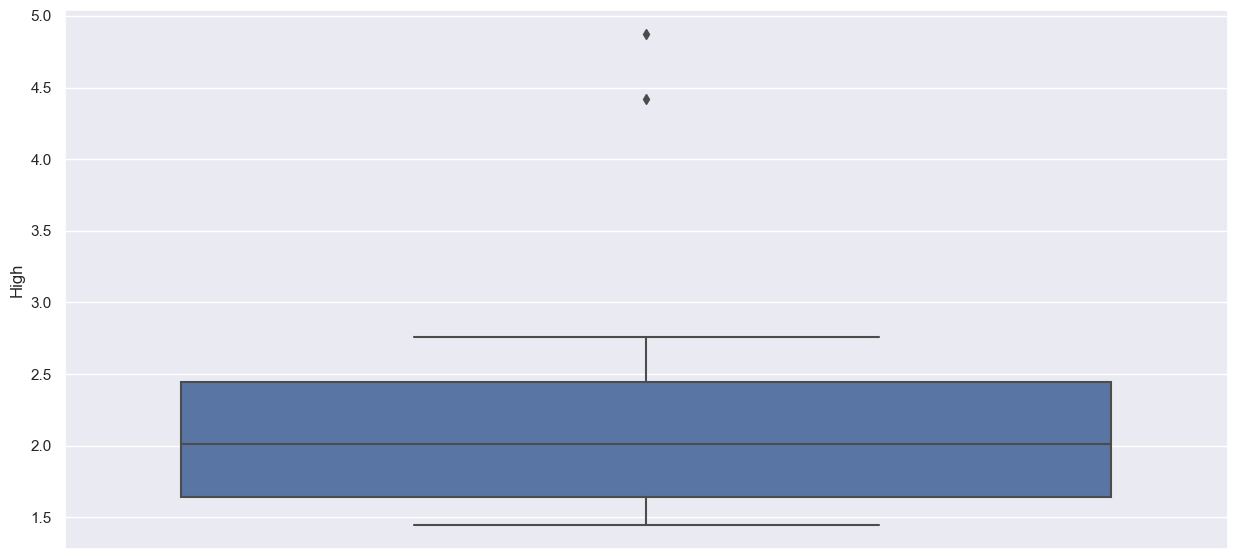

In [77]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_4['High']);
plt.show()

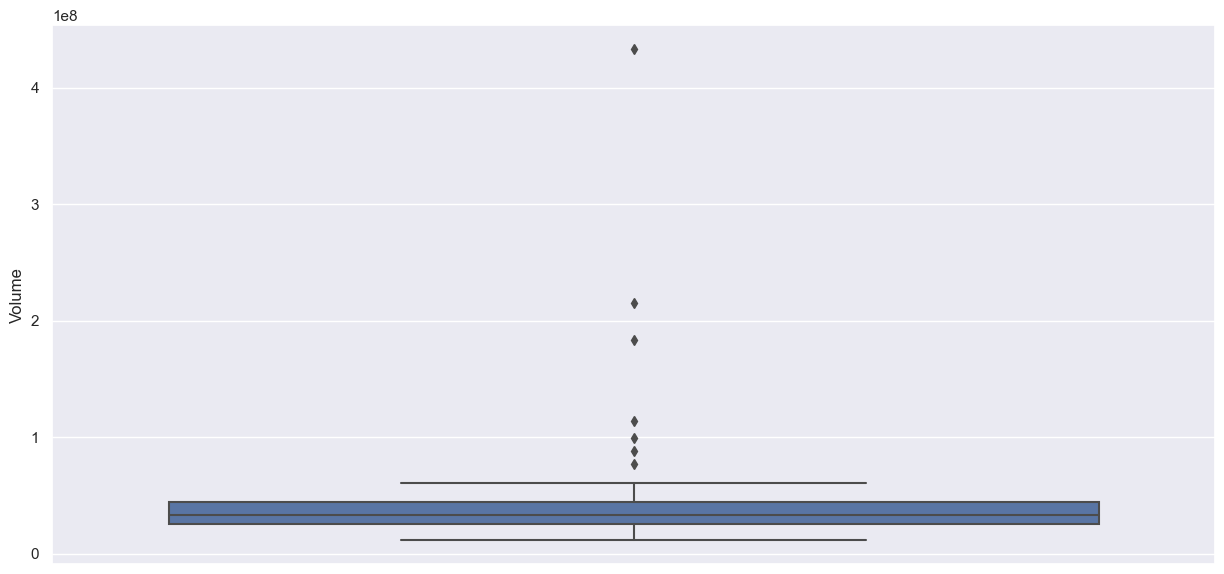

In [78]:
sns.set(rc={'figure.figsize':(15,7)})
sns.boxplot(y=df_4['Volume']);
plt.show()

#### scatter plots

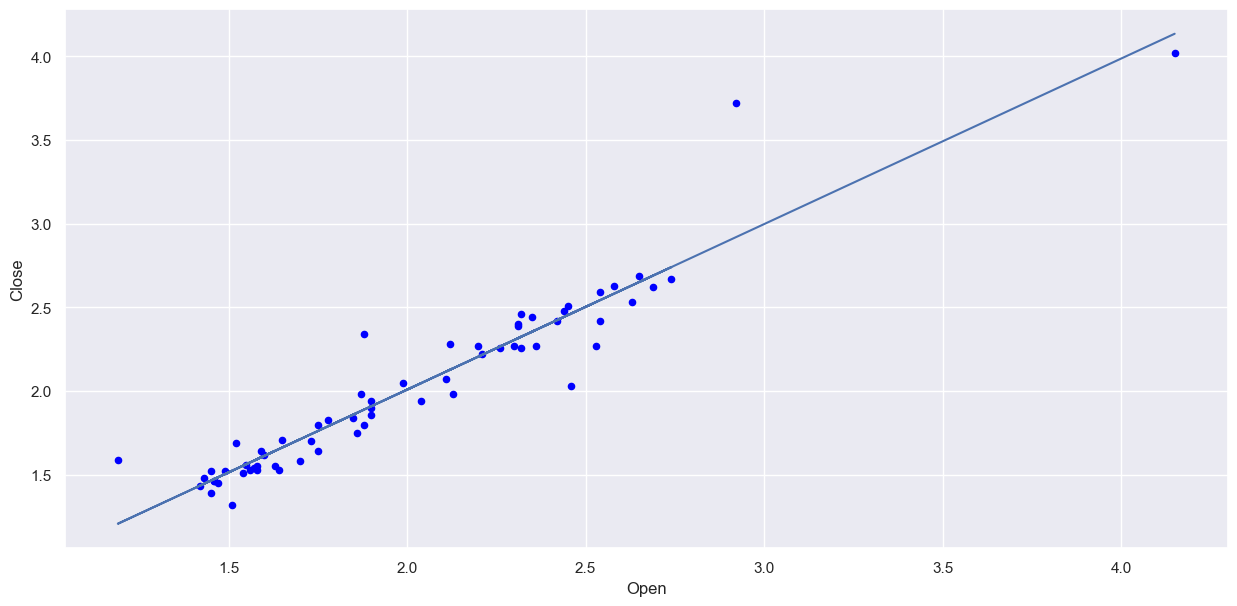

In [79]:
#scatter plot showing relationship between open and close prices
df_4.plot.scatter(x='Open',y='Close',c=('blue'))
#obtaining the slop and intercept of regression line
x=df_4.Open
y=df_4.Close
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

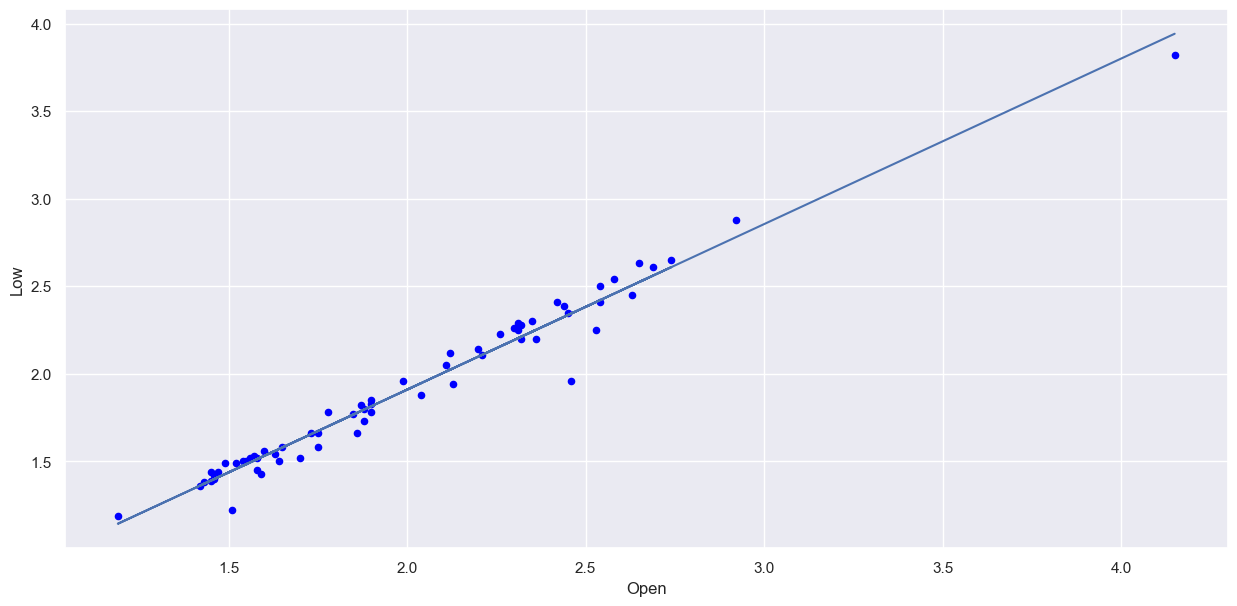

In [80]:
#scatter plot showing relationship between open and low prices
df_4.plot.scatter(x='Open',y='Low',c=('blue'))
#obtaining the slop and intercept of regression line
x=df_4.Open
y=df_4.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

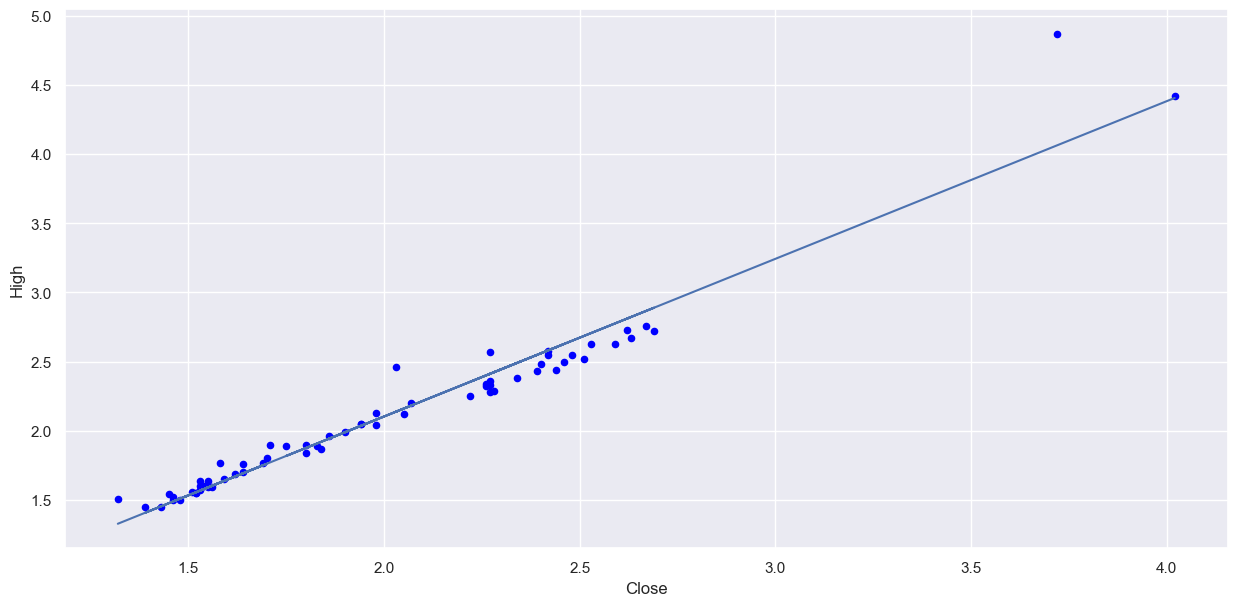

In [81]:
#scatter plot showing relationship between close and high prices
df_4.plot.scatter(x='Close',y='High',c=('blue'))
#obtaining the slop and intercept of regression line
x=df_4.Close
y=df_4.High
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);

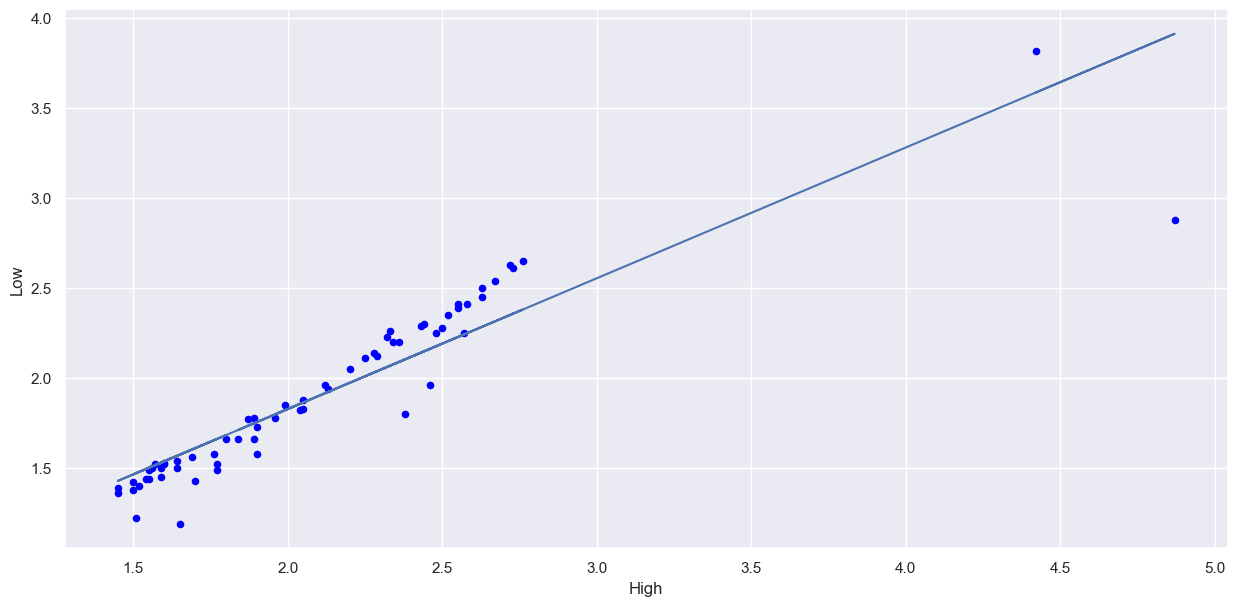

In [82]:
#scatter plot showing relationship between high and low prices
df_4.plot.scatter(x='High',y='Low',c=('blue'))
#obtaining the slop and intercept of regression line
x=df_4.High
y=df_4.Low
m,b=np.polyfit(x,y,1)
#creating a regression line on the plot
plt.plot(x,m*x+b);